# DIABETES LEARNING



In [1]:
isGoogleColab = True

# Notes

- check these blog posts: https://muellerzr.github.io/fastblog/ and his course: https://walkwithfastai.com/intro.contribute
- learner.export() already save all the transforms that will be applied during inference time, so it is not necessary to resize or normalize stats. If running outside the model outside fastai, check: https://forums.fast.ai/t/do-we-need-to-normalize-single-image-before-running-predict-function-on-it/44301/4
- to_fp16() is mixed precision
- item_tfms already apply the resize before collating the images in a batch. So it is not necessary to do this manually
- aug_tfms will only be applied on train_dl. validation and test will not be affected
- test_dl is a testing dataloader that uses the same transforms as train_dl and valid_dl, but with new data
- check images cleaner in the future
- cross validation: check walkwithfastai video 3 or https://forums.fast.ai/t/is-it-possible-to-implement-cross-validation-in-fastai/44961/15 or https://forums.fast.ai/t/am-i-doing-k-fold-cross-validation-right/84738/6  
- stratification in Kfold and Train_Test split for Multi Label problems is not straighforward. Check http://scikit.ml/index.html#. Use for now balanced datasets!!!!



# Installation

## Kill all other GPU sessions

Run the first time this cell. Then, restart your session and run again the notebook without this code.

In [2]:
  #!kill -9 -1

## Keep Session Alive

Put this javascript code in the browser console

In [3]:
# function ClickConnect(){
#    console.log("Working");
#    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
# }  setInterval(ClickConnect,300000)

## Update ipython/ipykernel (Colab)

The Colab session can fail when running the first time this cell. Just run it a second time.

In [4]:
# This magic cell should be put first in your colab notebook. 
# It'll automatically upgrade colab's really antique ipython/ipykernel to their 
# latest versions which are required for packages like ipyexperiments 

# from packaging import version
# import IPython, ipykernel
# IPython.__version__
# if version.parse(IPython.__version__) <= version.parse("5.5.0"):
#     !pip install -q --upgrade ipython
#     !pip install -q --upgrade ipykernel
    
#     import os
#     import signal
#     os.kill(os.getpid(), signal.SIGTERM)
# print(f"ipykernel=={ipykernel.__version__}")
# print(f"IPython=={IPython.__version__}")

In [5]:
# new (large)
# !pip install ipyexperiments
# new (large)
# from ipyexperiments import IPyExperimentsPytorch
# exp = IPyExperimentsPytorch()

## Check GPU e CPU RAM

In [6]:
if isGoogleColab:
    
    import torch
    from pynvml import *
    nvmlInit()
    def log_mem():
        h = nvmlDeviceGetHandleByIndex(0)
        info = nvmlDeviceGetMemoryInfo(h)
        print(f'GPU total Memory    : {info.total}')
        print(f'GPU free Memory     : {info.free}')
        print(f'GPU Memory used     : {info.used}')
    torch.ones(1).to(0)
    log_mem()

    !nvidia-smi

GPU total Memory    : 11996954624
GPU free Memory     : 11526799360
GPU Memory used     : 470155264
Tue Sep 28 23:35:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    58W / 149W |    448MiB / 11441MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+------------

## Mount the Google Drive to Google Colab

In [7]:
if isGoogleColab:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    path_to_drive = "/content/drive/MyDrive/Colab Notebooks/"
    sys.path.append(path_to_drive + 'DevDiabetesLearning/DiabetesLearningAI/') #make src files importable

else:
    path_to_drive = "./"

Mounted at /content/drive


In [8]:
#!unrar x "/content/drive/My Drive/Colab Notebooks/DiabetesLearning/augmentedDataset_v2.rar" "/content/drive/My Drive/Colab Notebooks/DiabetesLearning/"
#!unrar x "/content/drive/My Drive/Colab Notebooks/DiabetesLearning/augmentedDataset.rar" # extrai local
#!unzip "/content/drive/My Drive/Colab Notebooks/DiabetesLearning/database.zip" -d "/content/drive/My Drive/Colab Notebooks/DiabetesLearning/"

## Install Deep Learning libraries

In [9]:
# !pip install torch==1.9.0
# !pip install torchvision==0.10.0
# !pip install fastai==2.4.1
# !pip install pytorch-lightning==1.4.8
# !pip install wandb


# !pip install fastai==2.0.19
# !pip install torchvision==0.7
# !pip install torch==1.6.0
# !pip install fastcore==1.3.2
# !pip install wandb
# !pip install fastprogress==0.2.4

# ##restart runtime!!!

In [2]:
import sys; print('Python:',sys.version)
import torch; print('Pytorch:',torch.__version__)
import torchvision; print('Torchvision:',torchvision.__version__)
import fastai; print('Fastai:',fastai.__version__)

Python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Pytorch: 1.9.0+cu102
Torchvision: 0.10.0+cu102
Fastai: 1.0.61


# Data

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.callback.wandb import *
import torch
import torchvision
from PIL import Image

In [12]:
path = path_to_drive + 'DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint0/'
path_anno = path + 'gt/'
path_img = path + 'done/'

pathUnimib = path_to_drive + 'DevDiabetesLearning/DiabetesLearningAI/dataset_UNIMIB/' 
pathUnimib_anno = pathUnimib + 'gt/'
pathUnimib_img = pathUnimib + 'done/'


In [13]:
np.random.seed(2) #mesma semente para todas as vezes que executar
randomSeed = 2

fnames = get_image_files(path_img)
print(fnames[:3])

fnamesUnimib = get_image_files(pathUnimib_img)
print(fnamesUnimib[:-3])

fnames += fnamesUnimib
len(fnames)

[Path('/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint0/done/231.jpg'), Path('/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint0/done/677.jpg'), Path('/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint0/done/526.jpeg')]
[Path('/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/dataset_UNIMIB/done/20151127_121649.jpg'), Path('/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/dataset_UNIMIB/done/20151127_121831.jpg'), Path('/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/dataset_UNIMIB/done/20151127_121903.jpg'), Path('/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/dataset_UNIMIB/done/20151127_121906.jpg'), Path('/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/dataset_UNIMIB/done/20151127_121953.jpg

1496

In [14]:
codes = np.loadtxt(path + 'classesNumber.txt', dtype=str, delimiter='\n',encoding='utf')
codesId = [code.split(": ")[0] for code in codes]
codes = [code.split(": ")[1] for code in codes] #pega apenas o nome de cada classe e ignora o ID
len(codes)

77

In [15]:
### fix GT ids: masks must be [0, 1, …, K-1] where K is the number of categories

def get_y_fn(item):
  "Grab a mask from a `filename` and adjust the pixels based on `adjustedGroundTruthIds`"
  if "sprint0" in str(item):
    itemGtPath = path_anno + '/' + f'{item.stem}_GT.png'
  elif "UNIMIB" in str(item):
    itemGtPath = pathUnimib_anno + '/' + f'{item.stem}GT.png'

  msk = np.array(PILMask.create(itemGtPath))
  mx = np.max(msk)
  for i, val in enumerate(adjustedGroundTruthIds):
    msk[msk==adjustedGroundTruthIds[i]] = val
  return PILMask.create(msk)

adjustedGroundTruthIds = dict()
adjustedGroundTruthIds = {i : int(codesId[i]) for i in range(len(codes))}

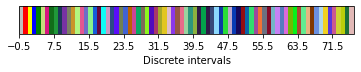

In [16]:
# define colormap for masks

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = matplotlib.colors.ListedColormap([np.random.rand(3,) for i in range(0,len(codes))])
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.75, .75, .75, 1.0) # nao alimento -> cinza
cmaplist[1] = "red" # nao registrado
cmaplist[2] = "yellow" #arroz integral
cmaplist[3] = "blue" #arroz branco
cmaplist[4] = "green" #feijao

cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = [i-0.5 for i in range(0,len(codes)+1)] # intervalos devem conter apenas o numero inteiro, entao ir de 0.5 em 0.5
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

cb2 = matplotlib.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Discrete intervals')
fig.show()

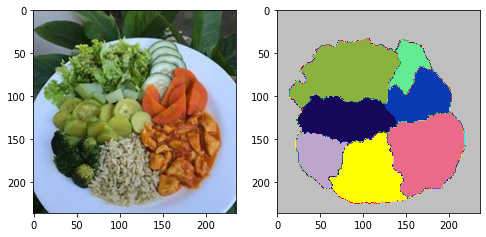

Ground truth Codes [ 0  2 37 40 48 49 50 65]
/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint0/done/181.jpg


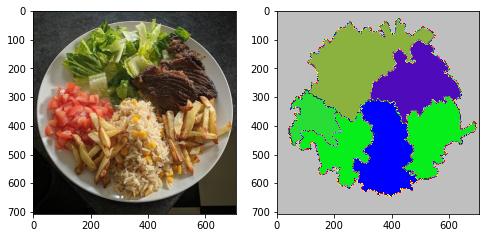

Ground truth Codes [ 0  3 30 40 47 63]
/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint0/done/813.jpg


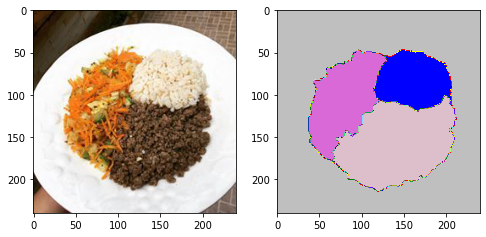

Ground truth Codes [ 0  3 34 61]
/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint0/done/773.jpg


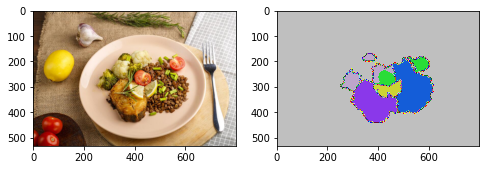

Ground truth Codes [ 0 17 35 47 48 73]
/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint0/done/870.jpg


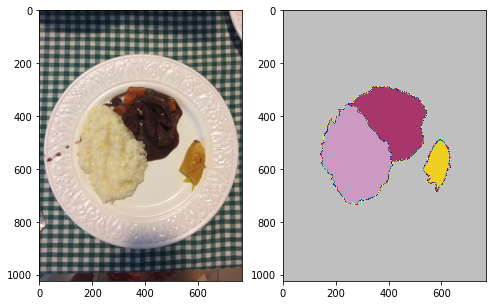

Ground truth Codes [ 0 20 31 70]
/content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint0/done/459.jpeg


In [17]:
### VISUALIZACAO DA MÁSCARA FICA COM A BORDA ESTRANHA, MAS ELA ESTÁ CORRETA COMO PODE SER VISTO NOS CODIGOS DO GROUND TRUTH

for idx in range(200,205):
  fig = plt.figure(figsize=(8,8))

  img = Image.open(fnames[idx])
  arr = np.asarray(img)
  ax1 = fig.add_subplot(1,2,1)
  ax1.imshow(arr)

  img1 = get_y_fn(fnames[idx]) # use this when 'adjustedGroundTruthIds' is necessary
  # img1 = Image.open(get_y_fn(fnames[idx]))
  arr = np.asarray(img1)
  ax1 = fig.add_subplot(1,2,2)
  ax1.imshow(arr, cmap=cmap, norm=norm)
  plt.show()

  print("Ground truth Codes", np.unique(arr,return_counts=False))
  print(fnames[idx])


## MASK RCNN UTILS

In [1]:
from torchvision import transforms as T
import cv2


def get_prediction(img_path, threshold, codes, model):
  img = Image.open(img_path)
  transform = T.Compose([T.ToTensor()])
  img = transform(img).to(device)
  pred = model([img])
  pred_score = list(pred[0]['scores'].detach().cpu().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
  masks = (pred[0]['masks']>0.5).squeeze().detach().cpu().numpy()
  pred_class = [codes[i] for i in list(pred[0]['labels'].cpu().numpy())]
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().cpu().numpy())]
  masks = masks[:pred_t+1]
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  pred_scores = pred_score[:pred_t+1]
  return masks, pred_boxes, pred_class, pred_scores

def random_colour_masks(image):
  colours = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  r[image == 1], g[image == 1], b[image == 1] = colours[random.randrange(0,10)]
  coloured_mask = np.stack([r, g, b], axis=2)
  return coloured_mask

def drawPrediction(img, masks, boxes, pred_cls, pred_scores, threshold=0.5, rect_th=1, text_size=0.5, text_th=2):

  for i in range(len(masks)):
    rgb_mask = random_colour_masks(masks[i])
    img = cv2.addWeighted(img, 1, rgb_mask, 0.5, 0)
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th)
    cv2.putText(img,pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)
    print(pred_cls[i] + ": " + "{:.2f}%".format(pred_scores[i] * 100))

  plt.figure(figsize=(8,8))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

def instance_segmentation_api(img_path, codes, model, threshold=0.5):
  masks, boxes, pred_cls, pred_scores = get_prediction(img_path, threshold, codes, model)
  
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  drawPrediction(img, masks, boxes, pred_cls, pred_scores, threshold)


# Pytorch Implementation



## MASK RCNN TEST


In [19]:
# model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
# model.eval()

# model.transform.min_size = (512,)
# model.transform.max_size = 512
# print("Loaded model")

# COCO_INSTANCE_CATEGORY_NAMES = [
#     '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
#     'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
#     'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
#     'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
#     'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
#     'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
#     'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
#     'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
#     'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
#     'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
#     'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
#     'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
# ]


# instance_segmentation_api(str(fnames[15]), COCO_INSTANCE_CATEGORY_NAMES, model)

## Dataset

In [19]:
class FoodDataset(torch.utils.data.Dataset):
    def __init__(self, fnames, foodDetectionOnly=False, transforms=None):
        self.fnames = fnames
        self.transforms = transforms
        self.foodDetectionOnly = foodDetectionOnly

    def __getitem__(self, idx):
        img = Image.open(self.fnames[idx]).convert("RGB")
        mask = get_y_fn(self.fnames[idx]) # use this when 'adjustedGroundTruthIds' is necessary
        mask = np.array(mask)

        # instances are encoded as different colors
        obj_ids = np.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]

        # split the color-encoded mask into a set
        # of binary masks
        masks = mask == obj_ids[:, None, None]

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        # convert everything into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        masks = torch.as_tensor(masks, dtype=torch.uint8)
        
        if self.foodDetectionOnly:
          # there is only one class for food detection
          labels = torch.ones((num_objs,), dtype=torch.int64)
        else:
          labels = torch.as_tensor(obj_ids, dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks


        ###### IGNORE THIS: it is necessary to be compatible with COCO dataset and torchvision engine
        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd
        ######

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.fnames)


In [20]:
isFoodDetectionOnly = True
testing = FoodDataset(fnames, foodDetectionOnly=isFoodDetectionOnly)

# Food detection or Multi Label Classification?
if isFoodDetectionOnly: 
  codes = [codes[0],"Food"]

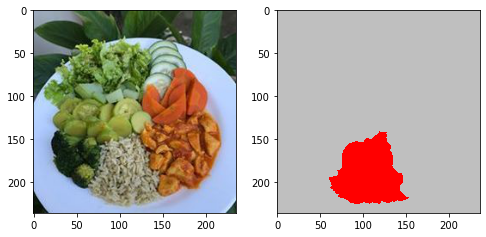

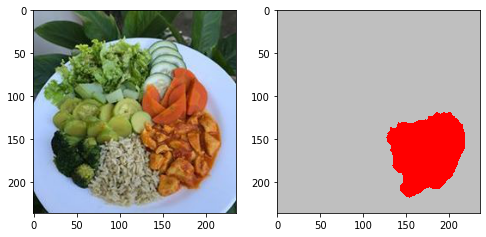

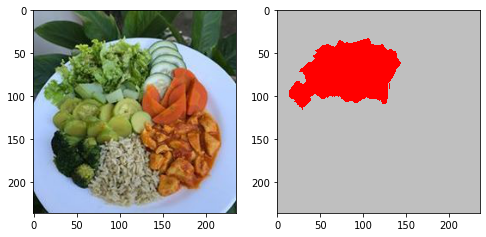

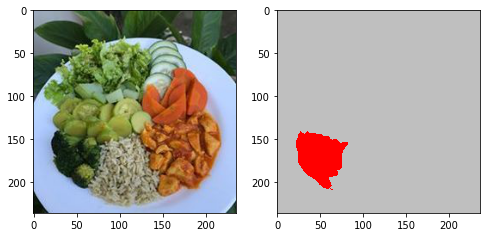

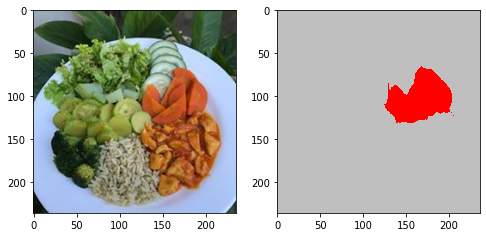

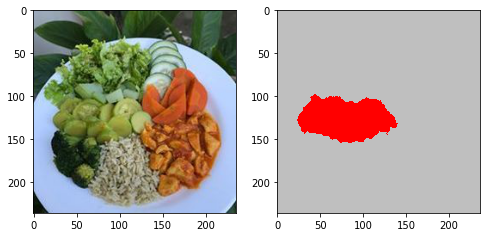

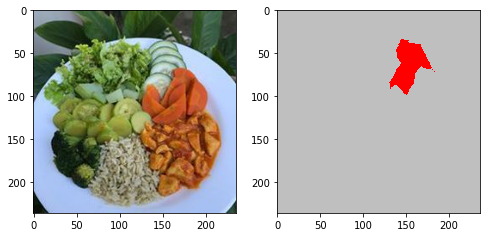

In [21]:
# show multiple masks from objects

idx = 200
img, label = testing[idx]
img = np.asarray(img)
for mask in label["masks"]:
  fig = plt.figure(figsize=(8,8))

  ax1 = fig.add_subplot(1,2,1)
  ax1.imshow(img)

  ax1 = fig.add_subplot(1,2,2)
  ax1.imshow(mask, cmap=cmap, norm=norm)
  plt.show()

Food: 100.00%
Food: 100.00%
Food: 100.00%
Food: 100.00%
Food: 100.00%
Food: 100.00%


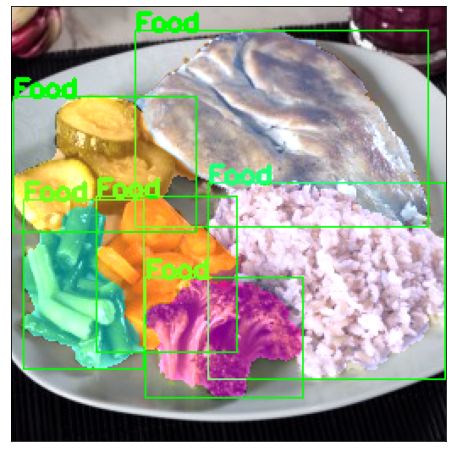

Food: 100.00%
Food: 100.00%
Food: 100.00%
Food: 100.00%


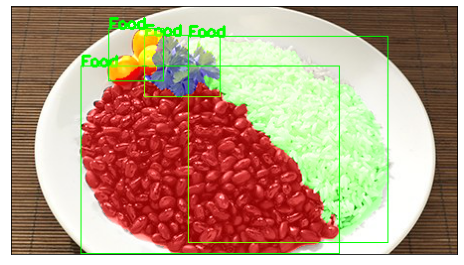

Food: 100.00%


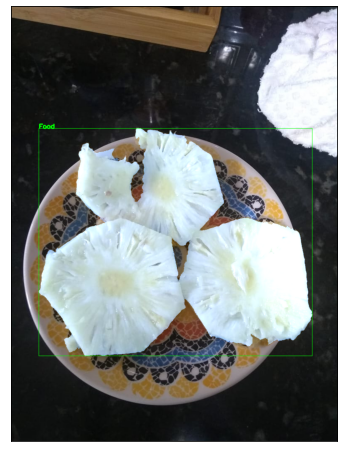

In [22]:
idx = 0

for idx in range(0,3):
  img, label = testing[idx]
  img = np.asarray(img)
  boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(label['boxes'].detach().numpy())]
  labels = [codes[id] for id in (label["labels"])]
  scores = [1]*len(labels)
  drawPrediction(img, label["masks"], boxes, labels,scores)

In [23]:
# get data split from files or function

#### split train/test randomly ####
#from sklearn.model_selection import train_test_split
#X_train, X_test, _, _ = train_test_split(fnames, label_fnames, test_size=0.2, random_state=randomSeed, shuffle=True, stratify=None)

#### split by validation.txt ####
# testFiles = np.loadtxt(path + 'validation.txt', dtype=str, delimiter='\n',encoding='utf')
# X_test = [file for file in fnames if file.name in testFiles]

#### split by filenames array from pickle ####
import pickle
with open(path + "testFilenames.pkl", 'rb') as f:
  testFiles = pickle.load(f)
X_test = [file for file in fnames if file.name in testFiles]
X_train = [file for file in fnames if file.name not in testFiles]

len(X_train), len(X_test)

(1389, 107)

## Data Augmentation

In [24]:
import torch
import torchvision

from torch import nn, Tensor
import torchvision.transforms.functional as F
import torchvision.transforms as T

class RandomPhotometricDistort(nn.Module):
    def __init__(self, contrast = (0.5, 1.5), saturation = (0.5, 1.5),
                 hue = (-0.05, 0.05), brightness = (0.875, 1.125), p = 0.5):
        super().__init__()
        self._brightness = T.ColorJitter(brightness=brightness)
        self._contrast = T.ColorJitter(contrast=contrast)
        self._hue = T.ColorJitter(hue=hue)
        self._saturation = T.ColorJitter(saturation=saturation)
        self.p = p

    def forward(self, image,
                target = None):
        if isinstance(image, torch.Tensor):
            if image.ndimension() not in {2, 3}:
                raise ValueError('image should be 2/3 dimensional. Got {} dimensions.'.format(image.ndimension()))
            elif image.ndimension() == 2:
                image = image.unsqueeze(0)

        r = torch.rand(7)

        if r[0] < self.p:
            image = self._brightness(image)

        contrast_before = r[1] < 0.5
        if contrast_before:
            if r[2] < self.p:
                image = self._contrast(image)

        if r[3] < self.p:
            image = self._saturation(image)

        if r[4] < self.p:
            image = self._hue(image)

        if not contrast_before:
            if r[5] < self.p:
                image = self._contrast(image)

        if r[6] < self.p:
            channels = F.get_image_num_channels(image)
            permutation = torch.randperm(channels)

            is_pil = F._is_pil_image(image)
            if is_pil:
                image = F.to_tensor(image)
            image = image[..., permutation, :, :]
            if is_pil:
                image = F.to_pil_image(image)

        return image, target

class RandomHorizontalFlip(T.RandomHorizontalFlip):
    def forward(self, image,target):
        if torch.rand(1) < self.p:
            image = F.hflip(image)
            if target is not None:
                width, _ = F._get_image_size(image)
                target["boxes"][:, [0, 2]] = width - target["boxes"][:, [2, 0]]
                if "masks" in target:
                    target["masks"] = target["masks"].flip(-1)
                if "keypoints" in target:
                    keypoints = target["keypoints"]
                    keypoints = _flip_coco_person_keypoints(keypoints, width)
                    target["keypoints"] = keypoints
        return image, target

class ToTensor(nn.Module):
    def forward(self, image,target):
        image = F.to_tensor(image)
        return image, target

class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target

def get_transform(train):
    transforms = []
    transforms.append(ToTensor())
    if train:
        transforms.append(RandomHorizontalFlip(0.5))
        # transforms.append(RandomPhotometricDistort())
    return Compose(transforms)

## Dataloaders

In [25]:
def collate_fn(batch):
    return tuple(zip(*batch))

bs = 4 # batch size

trainset = FoodDataset(X_train, foodDetectionOnly=isFoodDetectionOnly, transforms=get_transform(train=True))
trainDataloader = torch.utils.data.DataLoader(
 trainset, batch_size=bs, shuffle=True, num_workers=4,
 collate_fn=collate_fn)

testset = FoodDataset(X_test, foodDetectionOnly=isFoodDetectionOnly, transforms=get_transform(train=False))
testDataloader = torch.utils.data.DataLoader(
 testset, batch_size=bs, shuffle=False, num_workers=4,
 collate_fn=collate_fn)

len(trainset), len(testset)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(1389, 107)

## Model

In [26]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,
                                                       num_classes)

    return model

In [27]:
#### freeze only backbone

def freezeBackboneLayer(model):
  for param in model.backbone.parameters():
    param.requires_grad=False

  for param in model.rpn.parameters():
    param.requires_grad=True
  for param in model.roi_heads.parameters():
    param.requires_grad=True

def unfreezeBackboneLayer(model):
  for param in model.backbone.parameters():
    param.requires_grad=True

  for param in model.rpn.parameters():
    param.requires_grad=True
  for param in model.roi_heads.parameters():
    param.requires_grad=True

In [29]:
# test model inputs and outputs

# images,targets = next(iter(trainDataloader))
# # images = list(image for image in images)
# # targets = [{k: v for k, v in t.items()} for t in targets]

# model = get_model_instance_segmentation(len(codes))
# output = model(images,targets)   # Returns losses and detections
# print(output)

# # For inference
# model.eval()
# x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
# predictions = model(x)           # Returns predictions
# print(predictions[0])

## Use Pytorch Lightning to train

In [30]:
sys.path.append(path_to_drive + 'DevDiabetesLearning/DiabetesLearningAI/torchvisionReferences/detection') #make src files importable
from torchvisionReferences.detection.engine import train_one_epoch, evaluate
import torch
from typing import List, Tuple
from torch import nn
from pytorch_lightning.core.lightning import LightningModule
import wandb
wandb.login()

class MaskRCNN(LightningModule):

    def __init__(self, lr=None, weight_decay=None, epochs=None, freezeBackbone=True):
        super().__init__()

        self.modelMaskrcnn = get_model_instance_segmentation(num_classes=len(codes))
        self.modelMaskrcnn.transform.min_size = (256,)
        self.modelMaskrcnn.transform.max_size = 256
        if freezeBackbone:
          self.freeze()

        # hparams
        self.max_epochs = epochs
        self.lr = lr if lr is not None else 0.01
        self.weight_decay = weight_decay if weight_decay is not None else 0.1

        # metrics
        # self.metricsMethods = BaseMetrics(codes, [])
        # self.modelMetrics = {'accuracy': self.metricsMethods.getAccuracy, 'f1score': self.metricsMethods.get_f1Score}
    
    def freeze(self):
      freezeBackboneLayer(self.modelMaskrcnn)
    
    def unfreeze(self):
      unfreezeBackboneLayer(self.modelMaskrcnn)

    def forward(self, input, target=None):
        if target is not None:
          return self.modelMaskrcnn(input, target) #train mode
        else: 
          return self.modelMaskrcnn(input) #eval mode
    
    def configure_optimizers(self):
        print("Configuring optimizer and setting sanity check to TRUE")
        self.validationSanityCheck = True
        params = [p for p in self.parameters() if p.requires_grad]
        optim = torch.optim.AdamW(params, lr=self.lr, weight_decay=self.weight_decay)
        lr_scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=self.lr,
                                                 steps_per_epoch=len(trainDataloader), epochs=self.max_epochs,
                                                 cycle_momentum=True)   
        return optim

        # return {
        #     "optimizer": optim,
        #     "lr_scheduler": {
        #         "scheduler": lr_scheduler
        #     }
        # }

    
    def training_step(self, batch, batch_idx):
        x, y = batch
        loss_dict = self(x, y)
        loss = sum(loss for loss in loss_dict.values())
        
        metrics = {}
        metrics["loss"] = loss
        self.log_dict(metrics, on_step=True, on_epoch=True)

        return metrics

    def validation_step(self, batch, batch_idx):
        x, y = batch
        preds = self(x)
               
        # metrics = self._calculateMetrics(preds, y, phase="val")
        metrics = {}
        metrics["val_loss"] = 0.0
        self.log_dict(metrics)  

        return metrics

    def validation_epoch_end(self, outputs):
        # metricsAvg = {}
        # for key in outputs[0].keys():
        #     metricsAvg[key] = torch.stack([x[key].float() for x in outputs]).mean()
        # print("validation_epoch_end", metricsAvg)

        # COCO evaluation
        if self.validationSanityCheck is False:
          results = evaluate(self.modelMaskrcnn, testDataloader, device=self.device)
        else:
          self.validationSanityCheck = False

        return {}

    # def test_step(self, batch, batch_idx):
    #     x, y = batch
    #     preds = self(x)
        
    #     # metrics = self._calculateMetrics(preds, y, phase="test")
    #     metrics["predictions"] = preds
    #     metrics["labels"] = y
    #     self.log_dict(metrics, on_step=False, on_epoch=False, logger=False, prog_bar=False)
  
    #     return metrics

    # def test_epoch_end(self, outputs):
    #     # flatten all predictions and labels! this will be slightly different from torchLightning metrics
    #     predictions = torch.tensor([])
    #     labels = torch.tensor([])
    #     for output in outputs:
    #         predictions = torch.cat((predictions, output['predictions']), 0)
    #         labels = torch.cat((labels, output['labels']), 0)

    #     bestProbabilities, bestPredictions  = self._getBestPredictions(predictions)
    #     labels = labels.cpu()

    #     # calculate metrics and classificationReport with flatten predictions and labels
    #     classificationReport = self.metricsMethods.getClassificationReport(bestPredictions, labels)
    #     metricsFlattenSklearn = self._calculateMetrics(predictions, labels, phase="test")
        
    #     # normal torchLightning average 
    #     metricsAvg = {}
    #     for key in outputs[0].keys():
    #         if key != "predictions" and key != "labels":
    #             metricsAvg[key] = torch.stack([x[key].float() for x in outputs]).mean()
        

    #     # classificationReport has slightly different results from metricsAvg because it flattens all inputs. MetricsAvg is the mean to each batch
    #     print(classificationReport)
    #     print("torch lightning avg metrics", metricsAvg)
    #     print("sklearn flatten metrics", metricsFlattenSklearn)

    #     return metricsAvg


    def _calculateMetrics(self, predictions, labels, phase):
        metrics = {}

        bestProbabilities, bestPredictions  = self._getBestPredictions(predictions)
        for metricName, functionToCall in self.modelMetrics.items():
            metricValue = torch.tensor(functionToCall(bestPredictions, labels.cpu()))
            metrics[phase + '_' + metricName] = metricValue
        
        return metrics

    def _getBestPredictions(self, predictions: torch.Tensor) -> Tuple[np.ndarray,np.ndarray]:
        probabilities = torch.softmax(predictions, 1)
        bestProbabilities, bestPredictions = torch.max(probabilities, 1)
        bestProbabilities = bestProbabilities.detach().cpu().numpy()
        bestPredictions = bestPredictions.detach().cpu().numpy()

        return bestProbabilities, bestPredictions 




wandb: Currently logged in as: bunoviske (use `wandb login --relogin` to force relogin)


In [31]:
# set hyperparameters
lr = 5e-4
wd = 1e-2
epochs = 20
grad_accumulation_batches = int(32/bs) # 32 is the final "batch size"

model = MaskRCNN(lr=lr, weight_decay=wd, epochs=epochs, freezeBackbone=True)

In [32]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping, QuantizationAwareTraining
from pytorch_lightning.loggers import WandbLogger
import wandb

wandb_logger = WandbLogger(project="diabetesLearning-instanceSegmentation", log_model=False)
wandb_logger.watch(model, log='all', log_freq=100)
#wandb_logger.log_hyperparams(hparams)

# monitored metric is different from val_epoch_end. Maybe because torch lightning applies weighted average on each batch (like they do for the loss) https://forums.pytorchlightning.ai/t/understanding-different-values-of-training-validation-loss-in-callback-metrics-dictionary/568
checkpoint_callback = ModelCheckpoint(monitor='loss', mode="min", verbose=True)
# early_stop_callback = EarlyStopping(monitor='val_loss', mode="min", patience=50, verbose=True)

trainer = Trainer(gpus=1,
            max_epochs=epochs, 
            accumulate_grad_batches=grad_accumulation_batches,
            # gradient_clip_val=1.0,
            # amp_backend='apex',
            # amp_level='02',
            precision=32,
            auto_lr_find=False,
            logger=wandb_logger,
            checkpoint_callback=True,
            callbacks=[checkpoint_callback])


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [33]:
# train last layers
model.freeze()
print("START TRAINING WITH FROZEN LAYERS")
trainer.fit(model, trainDataloader, testDataloader)

# finetune everything
model.unfreeze()
model.lr = 1e-4
print("START FINETUNNING")
trainer.fit(model, trainDataloader, testDataloader)

wandb.save(checkpoint_callback.best_model_path)
modelBest = MaskRCNN.load_from_checkpoint(checkpoint_path=checkpoint_callback.best_model_path)
torch.save(modelBest.state_dict(), path + "models/maskrcnn.pt")
print(checkpoint_callback.best_model_path)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type     | Params
-------------------------------------------
0 | modelMaskrcnn | MaskRCNN | 44.3 M
-------------------------------------------
17.5 M    Trainable params
26.8 M    Non-trainable params
44.3 M    Total params
177.304   Total estimated model params size (MB)


START TRAINING WITH FROZEN LAYERS
Configuring optimizer and setting sanity check to TRUE


Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:00:45  model_time: 0.4382 (0.4382)  evaluator_time: 0.0814 (0.0814)  time: 1.6853  data: 1.1522  max mem: 2086
Test:  [26/27]  eta: 0:00:00  model_time: 0.2255 (0.2468)  evaluator_time: 0.0229 (0.0393)  time: 0.2937  data: 0.0236  max mem: 2086
Test: Total time: 0:00:09 (0.3645 s / it)
Averaged stats: model_time: 0.2255 (0.2468)  evaluator_time: 0.0229 (0.0393)
Accumulating evaluation results...
DONE (t=0.32s).
Accumulating evaluation results...


Epoch 0, global step 11: loss reached 4.54312 (best 4.54312), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=0-step=11.ckpt" as top 1


DONE (t=0.34s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:00:47  model_time: 0.4187 (0.4187)  evaluator_time: 0.0648 (0.0648)  time: 1.7409  data: 1.2420  max mem: 2177
Test:  [26/27]  eta: 0:00:00  model_time: 0.2140 (0.2340)  evaluator_time: 0.0172 (0.0237)  time: 0.2606  data: 0.0230  max mem: 2177
Test: Total time: 0:00:09 (0.3386 s / it)
Averaged stats: model_time: 0.2140 (0.2340)  evaluator_time: 0.0172 (0.0237)
Accumulating evaluation results...
DONE (t=0.31s).
Accumulating evaluation results...


Epoch 1, global step 23: loss reached 2.68753 (best 2.68753), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=1-step=23.ckpt" as top 1


DONE (t=0.30s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:00:44  model_time: 0.3939 (0.3939)  evaluator_time: 0.0637 (0.0637)  time: 1.6514  data: 1.1799  max mem: 2202
Test:  [26/27]  eta: 0:00:00  model_time: 0.2181 (0.2359)  evaluator_time: 0.0169 (0.0305)  time: 0.2727  data: 0.0239  max mem: 2202
Test: Total time: 0:00:09 (0.3475 s / it)
Averaged stats: model_time: 0.2181 (0.2359)  evaluator_time: 0.0169 (0.0305)
Accumulating evaluation results...
DONE (t=0.31s).
Accumulating evaluation results...


Epoch 2, global step 35: loss reached 2.57140 (best 2.57140), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=2-step=35.ckpt" as top 1


DONE (t=0.30s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:00:47  model_time: 0.4469 (0.4469)  evaluator_time: 0.1311 (0.1311)  time: 1.7572  data: 1.1683  max mem: 2202
Test:  [26/27]  eta: 0:00:00  model_time: 0.2258 (0.2437)  evaluator_time: 0.0217 (0.0343)  time: 0.2758  data: 0.0222  max mem: 2202
Test: Total time: 0:00:09 (0.3570 s / it)
Averaged stats: model_time: 0.2258 (0.2437)  evaluator_time: 0.0217 (0.0343)
Accumulating evaluation results...
DONE (t=0.32s).
Accumulating evaluation results...


Epoch 3, global step 47: loss reached 2.42319 (best 2.42319), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=3-step=47.ckpt" as top 1


DONE (t=0.30s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:00:54  model_time: 0.5406 (0.5406)  evaluator_time: 0.1551 (0.1551)  time: 2.0013  data: 1.2982  max mem: 2240
Test:  [26/27]  eta: 0:00:00  model_time: 0.2780 (0.3050)  evaluator_time: 0.0636 (0.0832)  time: 0.3820  data: 0.0238  max mem: 2240
Test: Total time: 0:00:12 (0.4752 s / it)
Averaged stats: model_time: 0.2780 (0.3050)  evaluator_time: 0.0636 (0.0832)
Accumulating evaluation results...
DONE (t=0.34s).
Accumulating evaluation results...


Epoch 4, global step 59: loss reached 2.36061 (best 2.36061), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=4-step=59.ckpt" as top 1


DONE (t=0.35s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.004
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.004
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.010
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.004
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:04  model_time: 0.7142 (0.7142)  evaluator_time: 0.2411 (0.2411)  time: 2.3708  data: 1.3927  max mem: 2240
Test:  [26/27]  eta: 0:00:00  model_time: 0.3275 (0.3795)  evaluator_time: 0.0984 (0.1306)  time: 0.4864  data: 0.0230  max mem: 2240
Test: Total time: 0:00:16 (0.6010 s / it)
Averaged stats: model_time: 0.3275 (0.3795)  evaluator_time: 0.0984 (0.1306)
Accumulating evaluation results...
DONE (t=0.35s).
Accumulating evaluation results...


Epoch 5, global step 71: loss reached 2.34134 (best 2.34134), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=5-step=71.ckpt" as top 1


DONE (t=0.40s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.002
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.008
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.008
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.018
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.009
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:04  model_time: 0.7091 (0.7091)  evaluator_time: 0.2432 (0.2432)  time: 2.3706  data: 1.4017  max mem: 2240
Test:  [26/27]  eta: 0:00:00  model_time: 0.3480 (0.3899)  evaluator_time: 0.1420 (0.1522)  time: 0.5249  data: 0.0237  max mem: 2240
Test: Total time: 0:00:17 (0.6341 s / it)
Averaged stats: model_time: 0.3480 (0.3899)  evaluator_time: 0.1420 (0.1522)
Accumulating evaluation results...
DONE (t=0.36s).
Accumulating evaluation results...


Epoch 6, global step 83: loss reached 2.28374 (best 2.28374), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=6-step=83.ckpt" as top 1


DONE (t=0.37s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.003
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.009
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.010
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.020
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.011
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:13  model_time: 0.9594 (0.9594)  evaluator_time: 0.3170 (0.3170)  time: 2.7264  data: 1.4347  max mem: 2240
Test:  [26/27]  eta: 0:00:00  model_time: 0.4046 (0.4703)  evaluator_time: 0.1734 (0.2016)  time: 0.6393  data: 0.0234  max mem: 2240
Test: Total time: 0:00:20 (0.7658 s / it)
Averaged stats: model_time: 0.4046 (0.4703)  evaluator_time: 0.1734 (0.2016)
Accumulating evaluation results...
DONE (t=0.39s).
Accumulating evaluation results...


Epoch 7, global step 95: loss reached 2.24799 (best 2.24799), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=7-step=95.ckpt" as top 1


DONE (t=0.38s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.007
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.003
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.007
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.015
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.029
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.018
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:23  model_time: 1.1963 (1.1963)  evaluator_time: 0.3653 (0.3653)  time: 3.1043  data: 1.5224  max mem: 2240
Test:  [26/27]  eta: 0:00:01  model_time: 0.5456 (0.6182)  evaluator_time: 0.2680 (0.3274)  time: 0.9029  data: 0.0230  max mem: 2240
Test: Total time: 0:00:28 (1.0455 s / it)
Averaged stats: model_time: 0.5456 (0.6182)  evaluator_time: 0.2680 (0.3274)
Accumulating evaluation results...
DONE (t=0.44s).
Accumulating evaluation results...


Epoch 8, global step 107: loss reached 2.19392 (best 2.19392), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=8-step=107.ckpt" as top 1


DONE (t=0.43s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.006
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.014
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.028
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.029
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.043
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.033
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:25  model_time: 1.4372 (1.4372)  evaluator_time: 0.3696 (0.3696)  time: 3.1846  data: 1.3628  max mem: 2268
Test:  [26/27]  eta: 0:00:01  model_time: 0.5656 (0.6509)  evaluator_time: 0.2938 (0.3515)  time: 0.9494  data: 0.0240  max mem: 2268
Test: Total time: 0:00:29 (1.1001 s / it)
Averaged stats: model_time: 0.5656 (0.6509)  evaluator_time: 0.2938 (0.3515)
Accumulating evaluation results...
DONE (t=0.45s).
Accumulating evaluation results...


Epoch 9, global step 119: loss reached 2.16006 (best 2.16006), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=9-step=119.ckpt" as top 1


DONE (t=0.44s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.007
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.015
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.008
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.031
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.032
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.046
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.038
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:23  model_time: 1.1834 (1.1834)  evaluator_time: 0.3798 (0.3798)  time: 3.0818  data: 1.5009  max mem: 2268
Test:  [26/27]  eta: 0:00:00  model_time: 0.5174 (0.5921)  evaluator_time: 0.2548 (0.2977)  time: 0.8447  data: 0.0233  max mem: 2268
Test: Total time: 0:00:26 (0.9964 s / it)
Averaged stats: model_time: 0.5174 (0.5921)  evaluator_time: 0.2548 (0.2977)
Accumulating evaluation results...
DONE (t=0.44s).
Accumulating evaluation results...


Epoch 10, global step 131: loss reached 2.11592 (best 2.11592), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=10-step=131.ckpt" as top 1


DONE (t=0.40s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.007
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.009
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.017
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.034
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.034
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.040
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:24  model_time: 1.4907 (1.4907)  evaluator_time: 0.3771 (0.3771)  time: 3.1121  data: 1.2217  max mem: 2268
Test:  [26/27]  eta: 0:00:01  model_time: 0.5519 (0.6365)  evaluator_time: 0.2772 (0.3485)  time: 0.9244  data: 0.0245  max mem: 2268
Test: Total time: 0:00:29 (1.0762 s / it)
Averaged stats: model_time: 0.5519 (0.6365)  evaluator_time: 0.2772 (0.3485)
Accumulating evaluation results...
DONE (t=0.46s).
Accumulating evaluation results...


Epoch 11, global step 143: loss reached 2.07798 (best 2.07798), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=11-step=143.ckpt" as top 1


DONE (t=0.41s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.011
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.020
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.039
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.040
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.057
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.047
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:27  model_time: 1.4743 (1.4743)  evaluator_time: 0.4415 (0.4415)  time: 3.2443  data: 1.3074  max mem: 2268
Test:  [26/27]  eta: 0:00:01  model_time: 0.5862 (0.6489)  evaluator_time: 0.3108 (0.3665)  time: 0.9617  data: 0.0228  max mem: 2268
Test: Total time: 0:00:29 (1.1079 s / it)
Averaged stats: model_time: 0.5862 (0.6489)  evaluator_time: 0.3108 (0.3665)
Accumulating evaluation results...
DONE (t=0.48s).
Accumulating evaluation results...


Epoch 12, global step 155: loss reached 2.03257 (best 2.03257), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=12-step=155.ckpt" as top 1


DONE (t=0.46s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.012
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.024
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.044
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.045
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.060
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.053
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:24  model_time: 1.3355 (1.3355)  evaluator_time: 0.3884 (0.3884)  time: 3.1414  data: 1.3939  max mem: 2268
Test:  [26/27]  eta: 0:00:01  model_time: 0.5527 (0.6201)  evaluator_time: 0.3024 (0.3403)  time: 0.9062  data: 0.0237  max mem: 2268
Test: Total time: 0:00:28 (1.0551 s / it)
Averaged stats: model_time: 0.5527 (0.6201)  evaluator_time: 0.3024 (0.3403)
Accumulating evaluation results...
DONE (t=0.46s).
Accumulating evaluation results...


Epoch 13, global step 167: loss reached 1.98785 (best 1.98785), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=13-step=167.ckpt" as top 1


DONE (t=0.45s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.028
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.014
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.026
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.047
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.048
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.056
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:31  model_time: 1.3632 (1.3632)  evaluator_time: 0.6125 (0.6125)  time: 3.3806  data: 1.3923  max mem: 2268
Test:  [26/27]  eta: 0:00:01  model_time: 0.5755 (0.6613)  evaluator_time: 0.3241 (0.3647)  time: 0.9901  data: 0.0226  max mem: 2268
Test: Total time: 0:00:30 (1.1207 s / it)
Averaged stats: model_time: 0.5755 (0.6613)  evaluator_time: 0.3241 (0.3647)
Accumulating evaluation results...
DONE (t=0.43s).
Accumulating evaluation results...


Epoch 14, global step 179: loss reached 1.94981 (best 1.94981), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=14-step=179.ckpt" as top 1


DONE (t=0.45s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.031
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.030
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.051
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.065
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.061
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:26  model_time: 1.3937 (1.3937)  evaluator_time: 0.4080 (0.4080)  time: 3.2080  data: 1.3782  max mem: 2268
Test:  [26/27]  eta: 0:00:01  model_time: 0.5728 (0.6558)  evaluator_time: 0.3110 (0.3704)  time: 0.9923  data: 0.0247  max mem: 2268
Test: Total time: 0:00:30 (1.1253 s / it)
Averaged stats: model_time: 0.5728 (0.6558)  evaluator_time: 0.3110 (0.3704)
Accumulating evaluation results...
DONE (t=0.46s).
Accumulating evaluation results...


Epoch 15, global step 191: loss reached 1.91959 (best 1.91959), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=15-step=191.ckpt" as top 1


DONE (t=0.47s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.032
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.027
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.017
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.032
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.051
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.051
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.060
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:24  model_time: 1.4802 (1.4802)  evaluator_time: 0.4104 (0.4104)  time: 3.1232  data: 1.2238  max mem: 2268
Test:  [26/27]  eta: 0:00:01  model_time: 0.5485 (0.6263)  evaluator_time: 0.2691 (0.3268)  time: 0.9229  data: 0.0228  max mem: 2268
Test: Total time: 0:00:28 (1.0431 s / it)
Averaged stats: model_time: 0.5485 (0.6263)  evaluator_time: 0.2691 (0.3268)
Accumulating evaluation results...
DONE (t=0.43s).
Accumulating evaluation results...


Epoch 16, global step 203: loss reached 1.87041 (best 1.87041), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=16-step=203.ckpt" as top 1


DONE (t=0.44s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.015
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.026
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.018
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.036
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.054
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.055
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.065
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.065
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:26  model_time: 1.3355 (1.3355)  evaluator_time: 0.4302 (0.4302)  time: 3.1990  data: 1.4162  max mem: 2268
Test:  [26/27]  eta: 0:00:01  model_time: 0.5430 (0.6404)  evaluator_time: 0.2931 (0.3429)  time: 0.9381  data: 0.0229  max mem: 2268
Test: Total time: 0:00:29 (1.0811 s / it)
Averaged stats: model_time: 0.5430 (0.6404)  evaluator_time: 0.2931 (0.3429)
Accumulating evaluation results...
DONE (t=0.46s).
Accumulating evaluation results...


Epoch 17, global step 215: loss reached 1.83997 (best 1.83997), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=17-step=215.ckpt" as top 1


DONE (t=0.46s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.039
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.015
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.029
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.021
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.041
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.058
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.076
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.069
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:22  model_time: 1.3250 (1.3250)  evaluator_time: 0.3746 (0.3746)  time: 3.0462  data: 1.3291  max mem: 2268
Test:  [26/27]  eta: 0:00:00  model_time: 0.5232 (0.6021)  evaluator_time: 0.2459 (0.3101)  time: 0.8931  data: 0.0231  max mem: 2268
Test: Total time: 0:00:27 (1.0073 s / it)
Averaged stats: model_time: 0.5232 (0.6021)  evaluator_time: 0.2459 (0.3101)
Accumulating evaluation results...
DONE (t=0.45s).
Accumulating evaluation results...


Epoch 18, global step 227: loss reached 1.80296 (best 1.80296), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=18-step=227.ckpt" as top 1


DONE (t=0.45s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.045
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.030
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.025
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.043
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.062
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.062
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.074
IoU m

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:22  model_time: 1.2706 (1.2706)  evaluator_time: 0.3942 (0.3942)  time: 3.0609  data: 1.3761  max mem: 2268
Test:  [26/27]  eta: 0:00:01  model_time: 0.5257 (0.5933)  evaluator_time: 0.2717 (0.3267)  time: 0.8831  data: 0.0224  max mem: 2268
Test: Total time: 0:00:27 (1.0126 s / it)
Averaged stats: model_time: 0.5257 (0.5933)  evaluator_time: 0.2717 (0.3267)
Accumulating evaluation results...
DONE (t=0.46s).
Accumulating evaluation results...


Epoch 19, global step 239: loss reached 1.77765 (best 1.77765), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=19-step=239.ckpt" as top 1


DONE (t=0.44s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.049
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.017
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.026
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.045
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.063
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.063
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.074
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.075
IoU m

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type     | Params
-------------------------------------------
0 | modelMaskrcnn | MaskRCNN | 44.3 M
-------------------------------------------
44.3 M    Trainable params
0         Non-trainable params
44.3 M    Total params
177.304   Total estimated model params size (MB)


START FINETUNNING
Configuring optimizer and setting sanity check to TRUE


Validation sanity check: 0it [00:00, ?it/s]

Training: 90it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

creating index...
index created!
Test:  [ 0/27]  eta: 0:01:24  model_time: 1.4817 (1.4817)  evaluator_time: 0.4250 (0.4250)  time: 3.1241  data: 1.2106  max mem: 2774
Test:  [26/27]  eta: 0:00:01  model_time: 0.5414 (0.6286)  evaluator_time: 0.2677 (0.3294)  time: 0.9250  data: 0.0233  max mem: 2774
Test: Total time: 0:00:28 (1.0464 s / it)
Averaged stats: model_time: 0.5414 (0.6286)  evaluator_time: 0.2677 (0.3294)
Accumulating evaluation results...
DONE (t=0.44s).
Accumulating evaluation results...


Epoch 19, global step 251: loss reached 1.74835 (best 1.74835), saving model to "/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=19-step=251.ckpt" as top 1


DONE (t=0.45s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.049
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.015
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.035
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.024
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.048
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.067
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.067
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.111
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.077
IoU m

wandb: WARNING Saving files without folders. If you want to preserve sub directories pass base_path to wandb.save, i.e. wandb.save("/mnt/folder/file.h5", base_path="/mnt")


/content/diabetesLearning-instanceSegmentation/1cdz8u3u/checkpoints/epoch=19-step=251.ckpt


### Validate

Arroz Branco: 26.95%
Arroz Branco: 22.61%
Arroz Branco: 17.20%
Cenoura: 14.76%
Cenoura: 14.16%
Arroz Branco: 12.77%
Arroz Branco: 12.27%
Arroz Branco: 12.08%
Arroz Branco: 11.72%
Feijão: 11.49%
Feijão: 11.15%
Alface: 10.81%
Feijão: 10.29%


Arroz Branco: 27.46%
Arroz Branco: 21.60%
Cenoura: 15.76%
Arroz Branco: 15.32%
Feijão: 12.91%
Arroz Branco: 11.24%
Cenoura: 11.08%
Arroz Branco: 10.14%


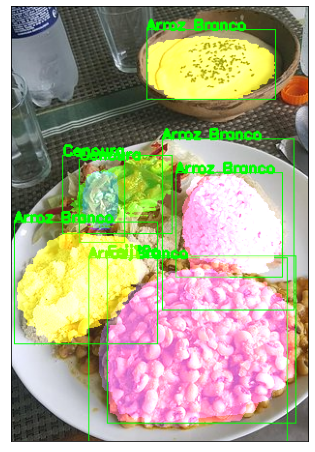

In [68]:
# validate

model.load_state_dict(torch.load(path + "models/maskrcnn.pt"))
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.eval()
idx = 0
for idx in range(50,52):
  instance_segmentation_api(str(X_test[idx]),codes, model, threshold=0.8)

## Use torchvision engine to train

In [28]:
sys.path.append(path_to_drive + 'DevDiabetesLearning/DiabetesLearningAI/torchvisionReferences/detection') #make src files importable
from torchvisionReferences.detection.engine import train_one_epoch, evaluate

In [29]:
modelMaskrcnn = get_model_instance_segmentation(num_classes=len(codes))
modelMaskrcnn.transform.min_size = (256,)
modelMaskrcnn.transform.max_size = 256

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
modelMaskrcnn.to(device)

# load trained model
# modelMaskrcnn.load_state_dict(torch.load(path + "maskrcnnTorchvisionTraining-77Classes.pt"))

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(256,), max_size=256, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inp

## TRAINING WITH FROZEN BACKBONE

In [31]:
# construct an optimizer

freezeBackboneLayer(modelMaskrcnn)
params = [p for p in modelMaskrcnn.parameters() if p.requires_grad]

lr = 0.001
wd = 0.0005
num_epochs = 20

optimizer = torch.optim.AdamW(params, lr=lr, weight_decay=wd)

# lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
#                                                 step_size=3,
#                                                 gamma=0.1)

lr_scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr,
                                                 steps_per_epoch=len(trainDataloader), epochs=num_epochs,
                                                 cycle_momentum=True)


In [ ]:
for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(modelMaskrcnn, optimizer, trainDataloader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    results = evaluate(modelMaskrcnn, testDataloader, device=device)

torch.save(modelMaskrcnn.state_dict(), path + "models/maskrcnnTorchvisionTraining-foodDetection.pt")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: [0]  [  0/348]  eta: 1:27:18  lr: 0.000000  loss: 7.4626 (7.4626)  loss_classifier: 0.4933 (0.4933)  loss_box_reg: 0.0146 (0.0146)  loss_mask: 3.0036 (3.0036)  loss_objectness: 3.4390 (3.4390)  loss_rpn_box_reg: 0.5121 (0.5121)  time: 15.0518  data: 11.8909  max mem: 2898
Epoch: [0]  [ 10/348]  eta: 0:14:20  lr: 0.000001  loss: 6.4984 (6.7915)  loss_classifier: 0.5000 (0.5023)  loss_box_reg: 0.1648 (0.1780)  loss_mask: 2.9657 (2.9455)  loss_objectness: 2.8247 (2.8096)  loss_rpn_box_reg: 0.2822 (0.3561)  time: 2.5454  data: 1.2191  max mem: 3013
Epoch: [0]  [ 20/348]  eta: 0:10:48  lr: 0.000002  loss: 6.4984 (6.6793)  loss_classifier: 0.4752 (0.4824)  loss_box_reg: 0.1954 (0.2128)  loss_mask: 2.8750 (2.8675)  loss_objectness: 2.2765 (2.7688)  loss_rpn_box_reg: 0.2822 (0.3478)  time: 1.3240  data: 0.1279  max mem: 3013
Epoch: [0]  [ 30/348]  eta: 0:08:59  lr: 0.000004  loss: 6.2497 (6.4944)  loss_classifier: 0.4059 (0.4389)  loss_box_reg: 0.1913 (0.1867)  loss_mask: 2.4974 (2.6395

## FINETUNNING

In [ ]:
# construct an optimizer

unfreezeBackboneLayer(modelMaskrcnn)
params = [p for p in modelMaskrcnn.parameters() if p.requires_grad]

lr = lr/2
wd = 0.0005
num_epochs = 30

optimizer = torch.optim.AdamW(params, lr=lr, weight_decay=wd)

# lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
#                                                 step_size=3,
#                                                 gamma=0.1)

lr_scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr,
                                                 steps_per_epoch=len(trainDataloader), epochs=num_epochs,
                                                 cycle_momentum=True)


In [ ]:
for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(modelMaskrcnn, optimizer, trainDataloader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    results = evaluate(modelMaskrcnn, testDataloader, device=device)

torch.save(modelMaskrcnn.state_dict(), path + "models/maskrcnnTorchvisionTraining-foodDetection-finetunning.pt")

In [ ]:
while True: pass

KeyboardInterrupt: ignored

In [ ]:
evaluate(modelMaskrcnn, testDataloader, device=device)

In [ ]:
# evaluate with acc_segmentation and miou

import functools

def concatMasks(mask1, mask2):
  bothNotZero = torch.logical_and(mask1, mask2)
  mask2[bothNotZero] = 0
  return mask1+mask2

def concatenateAndFlattenMasks(y_pred, y_true, threshold):
  flat_pred = torch.tensor([])
  flat_target = torch.tensor([])

  for pred, gt in zip(y_pred, y_true): #iterate every element in the batch and concatenate masks above certain threshold
    pred_masksWithLabel = []
    gt_masksWithLabel = []
    for pred_id, pred_mask, pred_score in zip(pred["labels"], pred["masks"], pred["scores"]):
      if pred_score > threshold:
        pred_mask = torch.round(pred_mask)
        pred_mask = torch.as_tensor(pred_mask, dtype=torch.uint8)
        pred_masksWithLabel.append(pred_mask*pred_id)
    for gt_id, gt_mask in zip(gt["labels"], gt["masks"]):
      gt_masksWithLabel.append(gt_mask*gt_id)
    
    if len(pred_masksWithLabel) == 0:
      concatenatedPreds = torch.zeros(gt_masksWithLabel[0].size())
    else:
      concatenatedPreds = functools.reduce(concatMasks, pred_masksWithLabel)
    concatenatedGts = functools.reduce(concatMasks, gt_masksWithLabel)
    flat_pred = torch.cat((flat_pred, concatenatedPreds.flatten()), dim=0)
    flat_target = torch.cat((flat_target, concatenatedGts.flatten()), dim=0)

    # fig = plt.figure(figsize=(8,8))
    # ax1 = fig.add_subplot(1,2,1)
    # ax1.imshow(concatenatedPreds.squeeze().detach().numpy(), cmap=cmap, norm=norm)
    # ax1 = fig.add_subplot(1,2,2)
    # ax1.imshow(concatenatedGts.squeeze().detach().numpy(), cmap=cmap, norm=norm)
    # plt.show()

  return flat_pred, flat_target

def acc_segmentationMaskRCNN(y_pred, y_target, threshold=0.8): # y_pred and y_target are lists of dicts (batches)
  flat_pred, flat_target = concatenateAndFlattenMasks(y_pred, y_target,threshold=threshold)
  void_code = 0
  mask = flat_target != void_code
  return (flat_pred[mask]==flat_target[mask]).float().mean()



In [ ]:
from statistics import mean

acc_total = []
modelMaskrcnn.to(torch.device("cpu"))
modelMaskrcnn.eval()
for batch in testDataloader:
  x, y = batch
  preds = modelMaskrcnn(x)
  acc_batch = acc_segmentationMaskRCNN(preds, y)
  acc_total.append(acc_batch.item())

print("Final acc_segmentation:", mean(acc_total))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


aqui
aqui
aqui
aqui
aqui
aqui
aqui
aqui
aqui
Final acc_segmentation: 0.3854603439017578


Tomate: 99.24%
Alface: 90.66%
Carne de Vaca: 77.92%


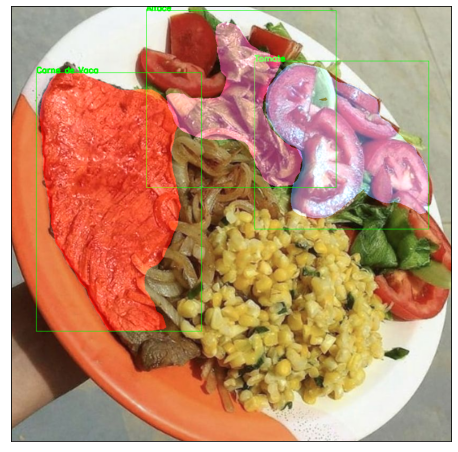

Arroz Branco: 99.80%
Alface: 99.25%
Ovo: 91.57%
Banana da Terra: 90.03%
Feijão: 85.79%
Carne de Vaca: 76.21%


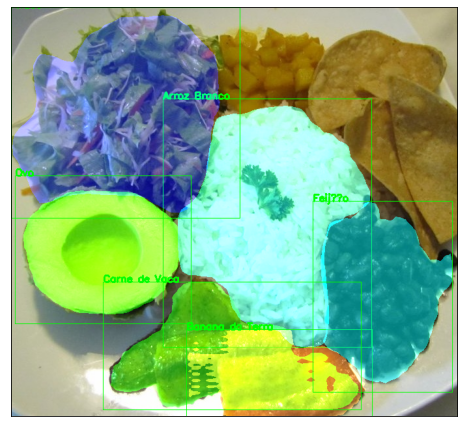

Arroz Branco: 81.16%


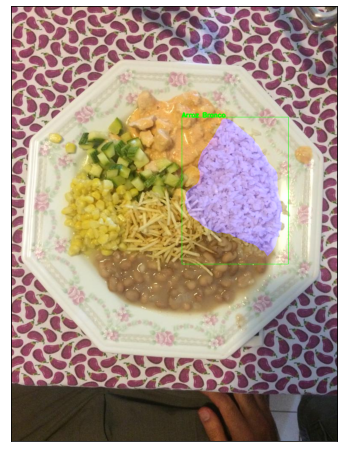

Frango (sem osso): 99.35%
Cenoura: 98.83%
Brócolis: 96.77%


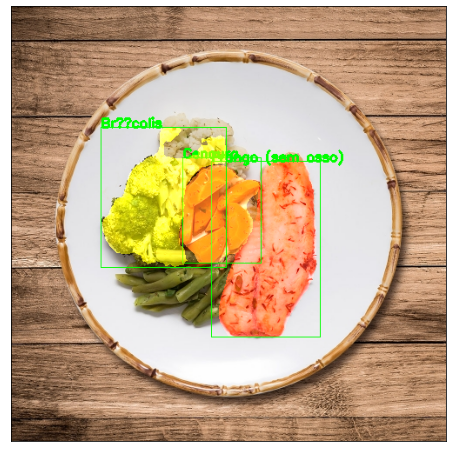

Brócolis: 99.37%
Alface com Tomate: 98.50%
Brócolis: 93.36%
Carne moída: 88.44%


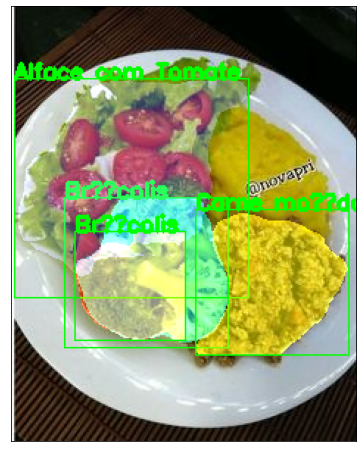

In [ ]:
# validate

start = 0
modelMaskrcnn.to(device)

for idx in range(start,start+5):
  instance_segmentation_api(str(X_test[idx]),codes, modelMaskrcnn, threshold=0.7)

# Predictions

Frango (sem osso): 99.72%
Feijão: 89.68%


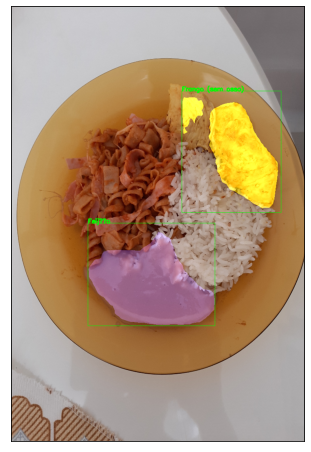

Arroz Branco: 98.32%
Arroz Branco: 85.80%


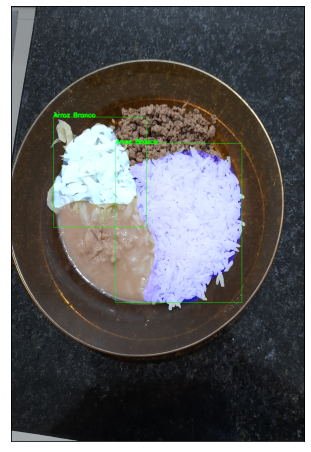

Carne de Vaca: 90.80%
Abóbora: 85.53%
Abobrinha: 79.27%


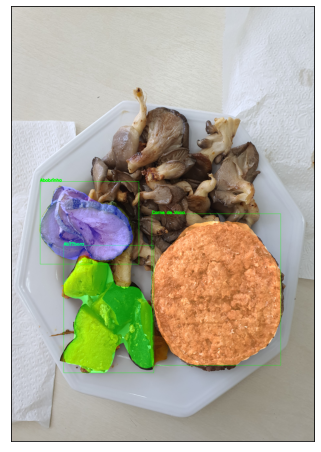

Frango (sem osso): 97.27%
Carne de Vaca: 82.78%
Alface: 77.62%


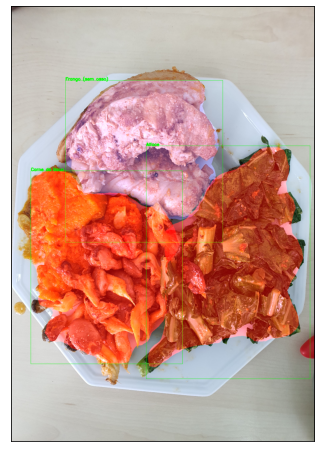

Arroz Branco: 99.48%
Alface: 94.06%
Carne moída: 75.18%


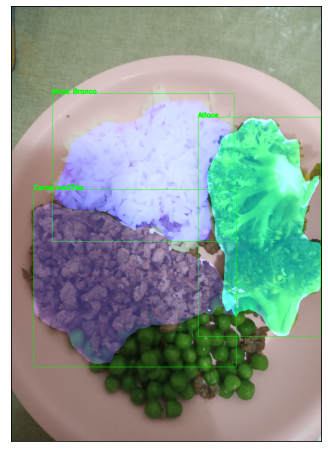

Cenoura: 99.79%
Arroz Branco: 89.99%
Carne moída: 75.93%


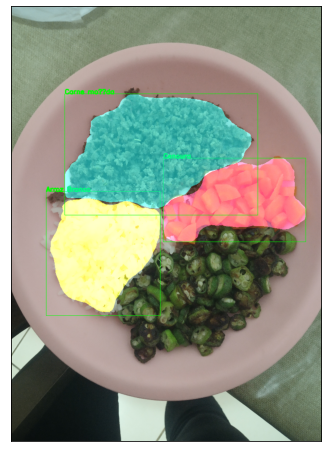

In [ ]:
filepaths = ["./mara1.png","./mara2.png", "joseila1.png","joseila2.png","joseila3.png", "joseila4.png"]

for file in filepaths:
  instance_segmentation_api(file,codes, modelMaskrcnn, threshold=0.75)

AlimentoNaoRegistrado: 100.00%
AlimentoNaoRegistrado: 100.00%
AlimentoNaoRegistrado: 99.96%
AlimentoNaoRegistrado: 99.92%
AlimentoNaoRegistrado: 99.81%
AlimentoNaoRegistrado: 99.64%
AlimentoNaoRegistrado: 97.61%


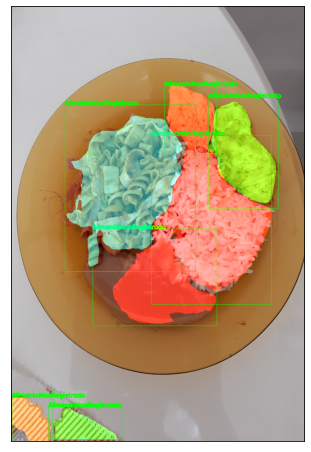

AlimentoNaoRegistrado: 99.99%
AlimentoNaoRegistrado: 99.86%
AlimentoNaoRegistrado: 99.63%
AlimentoNaoRegistrado: 94.19%
AlimentoNaoRegistrado: 91.69%
AlimentoNaoRegistrado: 90.78%


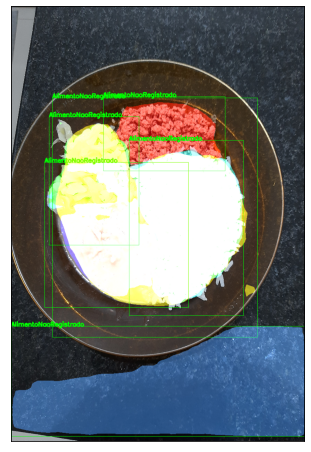

AlimentoNaoRegistrado: 100.00%
AlimentoNaoRegistrado: 100.00%
AlimentoNaoRegistrado: 100.00%
AlimentoNaoRegistrado: 99.98%
AlimentoNaoRegistrado: 99.97%
AlimentoNaoRegistrado: 99.91%
AlimentoNaoRegistrado: 99.86%
AlimentoNaoRegistrado: 99.83%
AlimentoNaoRegistrado: 99.82%
AlimentoNaoRegistrado: 99.66%
AlimentoNaoRegistrado: 99.44%
AlimentoNaoRegistrado: 99.32%
AlimentoNaoRegistrado: 98.94%
AlimentoNaoRegistrado: 95.80%
AlimentoNaoRegistrado: 94.38%
AlimentoNaoRegistrado: 94.11%
AlimentoNaoRegistrado: 91.49%
AlimentoNaoRegistrado: 90.25%


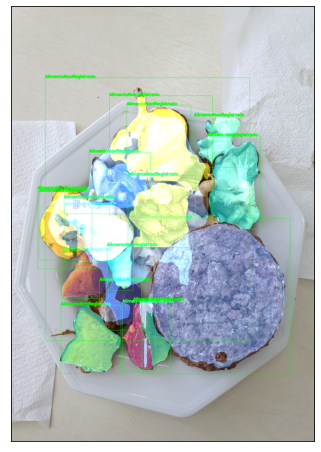

AlimentoNaoRegistrado: 99.90%
AlimentoNaoRegistrado: 99.31%
AlimentoNaoRegistrado: 98.87%
AlimentoNaoRegistrado: 98.81%
AlimentoNaoRegistrado: 98.79%
AlimentoNaoRegistrado: 98.77%
AlimentoNaoRegistrado: 98.75%
AlimentoNaoRegistrado: 98.46%
AlimentoNaoRegistrado: 97.43%
AlimentoNaoRegistrado: 97.03%
AlimentoNaoRegistrado: 96.29%
AlimentoNaoRegistrado: 95.86%
AlimentoNaoRegistrado: 94.55%
AlimentoNaoRegistrado: 93.79%
AlimentoNaoRegistrado: 92.25%


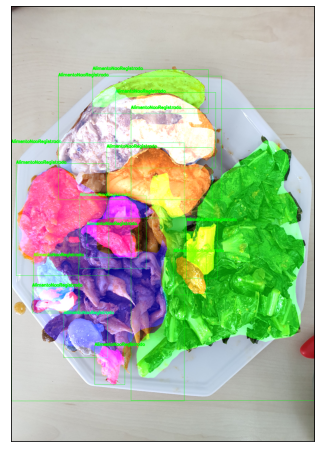

AlimentoNaoRegistrado: 99.74%
AlimentoNaoRegistrado: 99.04%
AlimentoNaoRegistrado: 98.92%
AlimentoNaoRegistrado: 98.80%
AlimentoNaoRegistrado: 96.79%
AlimentoNaoRegistrado: 96.36%
AlimentoNaoRegistrado: 95.40%
AlimentoNaoRegistrado: 95.00%
AlimentoNaoRegistrado: 94.59%
AlimentoNaoRegistrado: 94.48%
AlimentoNaoRegistrado: 93.60%
AlimentoNaoRegistrado: 91.19%
AlimentoNaoRegistrado: 90.28%


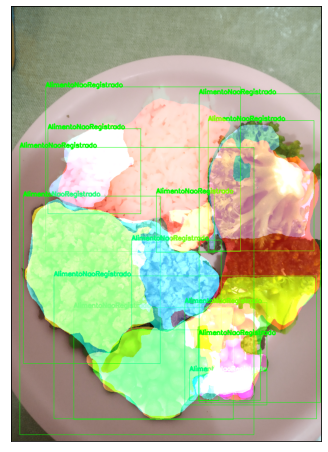

AlimentoNaoRegistrado: 99.98%
AlimentoNaoRegistrado: 99.79%
AlimentoNaoRegistrado: 99.61%
AlimentoNaoRegistrado: 98.14%
AlimentoNaoRegistrado: 95.72%
AlimentoNaoRegistrado: 95.17%
AlimentoNaoRegistrado: 92.53%
AlimentoNaoRegistrado: 90.18%


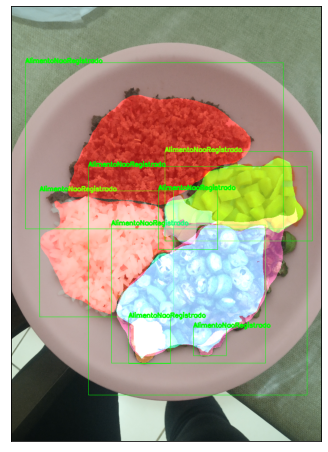

In [ ]:
modelMaskrcnn2 = get_model_instance_segmentation(num_classes=2)
modelMaskrcnn2.load_state_dict(torch.load(path + "maskrcnnTorchvisionTraining-bestResult.pt"))
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
modelMaskrcnn2.to(device)
modelMaskrcnn2.eval()

filepaths = ["./mara1.png","./mara2.png", "joseila1.png","joseila2.png","joseila3.png", "joseila4.png"]

for file in filepaths:
  instance_segmentation_api(file,codes, modelMaskrcnn2, threshold=0.9)



# Fastai implementation (SemTorch)


In [ ]:
# SemTorch
from semtorch import get_segmentation_learner

# MaskRCNN Data Utils
from semtorch.models.archs.mask_rcnn import MaskRCNNBlock, IntToFloatTensorMaskRCNN, TfmdDLV2, MaskRCNNDict

# MaskRCNN metrics
from semtorch.utils.metrics import DiceMaskRCNN, JaccardCoeffMaskRCNN

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


## Data Augmentation

In [ ]:
size = (256, 256)
# item_tfms = [Resize(size, method=ResizeMethod.Squish, resamples=(Image.NEAREST,Image.NEAREST))]
item_tfms = [IntToFloatTensorMaskRCNN]
aug_tfms = aug_transforms(mult=1, flip_vert=True, size=size)

## Dataloaders

In [ ]:
# The getters for DataBlock. Returning same image as input and get dict of image as target

foodDetectionOnly = True

def get_label_dict(o):

      mask = get_y_fn(o) # use this when 'adjustedGroundTruthIds' is necessary
      mask = np.array(mask)

      # instances are encoded as different colors
      obj_ids = np.unique(mask)
      # first id is the background, so remove it
      obj_ids = obj_ids[1:]

      # split the color-encoded mask into a set
      # of binary masks
      masks = mask == obj_ids[:, None, None]

      # get bounding box coordinates for each mask
      num_objs = len(obj_ids)
      boxes = []
      for i in range(num_objs):
          pos = np.where(masks[i])
          xmin = np.min(pos[1])
          xmax = np.max(pos[1])
          ymin = np.min(pos[0])
          ymax = np.max(pos[0])
          boxes.append([xmin, ymin, xmax, ymax])

      # convert everything into a torch.Tensor
      boxes = torch.as_tensor(boxes, dtype=torch.float32)
      masks = torch.as_tensor(masks, dtype=torch.uint8)
      
      if foodDetectionOnly:
        # there is only one class for food detection
        labels = torch.ones((num_objs,), dtype=torch.int64)
      else:
        labels = torch.as_tensor(obj_ids, dtype=torch.int64)

      target = {}
      target["boxes"] = boxes
      target["labels"] = labels
      target["masks"] = masks

      # if self.transforms is not None:
      #     img, target = self.transforms(img, target)

      return target

getters = [lambda o: o, get_label_dict]

In [ ]:
# dataset balance method. choose one of them or none

lossClassWeights = None
sampler = None

#### split by filenames array from pickle ####
import pickle
with open(path + "testFilenames.pkl", 'rb') as f:
  testFiles = pickle.load(f)
X_test = [file for file in fnames if file.name in testFiles]

In [ ]:
bs = 8 # batch size
gradientAcc = int(32/bs) # 32 is the final "batch size"

maskrcnnDataBlock = DataBlock(
    blocks=(ImageBlock, MaskRCNNBlock),
    get_items=get_image_files,
    getters=getters,
    splitter=FuncSplitter(lambda o: o in X_test),
    item_tfms=item_tfms,
    # batch_tfms=aug_tfms,
    dl_type=TfmdDLV2,
    n_inp=1
)

dataloaders = maskrcnnDataBlock.dataloaders(path_img, path=path, bs=bs)
dataloaders.vocab,dataloaders.c = codes,len(codes)

test_dl = dataloaders.test_dl(X_test, with_labels=True)
test_dl.vocab = codes

maskrcnnDataBlock.summary(path_img)


# trainBlock = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
#                    get_items=get_image_files,
#                    splitter=FuncSplitter(lambda o: o in X_test),
#                    get_y=get_y_fn,
#                    item_tfms=item_tfms, 
#                    batch_tfms=[*aug_tfms, Normalize.from_stats(*imagenet_stats)])
# dataloaders = trainBlock.dataloaders(path_img, path=path, bs=bs)
# trainBlock.summary(path_img)

Setting-up type transforms pipelines
Found 469 items
2 datasets of sizes 362,107
Setting up Pipeline: <lambda> -> PILBase.create
Setting up Pipeline: get_label_dict -> MaskRCNNDict.create

Building one sample
  Pipeline: <lambda> -> PILBase.create
    starting from
      /content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint0/done/231.jpg
    applying <lambda> gives
      /content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint0/done/231.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=257x257
  Pipeline: get_label_dict -> MaskRCNNDict.create
    starting from
      /content/drive/MyDrive/Colab Notebooks/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint0/done/231.jpg
    applying get_label_dict gives
      {'boxes': tensor([[116., 104., 256., 220.],
        [ 73.,  14., 246., 130.],
        [  7., 114.,  78., 214.],
        [ 79., 160., 172., 231.],
        [ 50., 112., 133

In [ ]:
len(dataloaders.train_ds), len(dataloaders.valid_ds), len(test_dl.dataset)

(362, 107, 107)

In [ ]:
# dataloaders.train.show_batch(max_n=4, figsize=(7, 7), cmap=cmap, norm=norm,alpha=0.9)

In [ ]:
# dataloaders.valid.show_batch(max_n=4, figsize=(7, 7), cmap=cmap, norm=norm,alpha=0.9)

In [ ]:
# test_dl.show_batch(max_n=4, figsize=(7, 7), cmap=cmap, norm=norm,alpha=0.9)

## Metrics

In [ ]:
from fastaiMetrics import acc_segmentationMaskRCNN, MIOU

# classes_index = range(1, len(codes)) #exclude background class at index 0
# metrics = [acc_segmentation, DiceMulti, MIOU(classes_index, axis=1)]

metrics = [acc_segmentationMaskRCNN, DiceMaskRCNN(), JaccardCoeffMaskRCNN()]

## Model

In [ ]:
#  Definition of the splitter for saying the learner what weights of the network to freeze

def maskrcnn_splitter(model):
    return [params(model.backbone), params(model.rpn), params(model.roi_heads)]

In [ ]:
numClasses = 2 if foodDetectionOnly else len(codes)
modelCallbacks = [ShowGraphCallback]
opt_func = Adam

learner = get_segmentation_learner(dls=dataloaders, number_classes=numClasses, segmentation_type="Semantic Segmentation",
                                 architecture_name="maskrcnn", backbone_name="resnet50", 
                                 image_size=256, metrics=metrics, wd=1e-2,
                                 splitter=maskrcnn_splitter,cbs=modelCallbacks, opt_func=opt_func)


# # EarlyStoppingCallback(monitor='miou',patience=50) -> if patience is too high, this may cause error in learner.validate()
# modelCallbacks = [ShowGraphCallback]
# opt_func = Adam
# learner = unet_learner(dataloaders, resnet34, loss_func=loss_func, opt_func=opt_func, metrics=metrics, cbs=modelCallbacks,
#                        self_attention=False, act_cls=Mish).to_fp32()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
#learner.model[0].load_state_dict(torch.load(path_to_drive + 'DiabetesLearning/trainingConfig/resnet34_encoder-food101.h5'), strict=True); #load preTrained from FOOD101

In [ ]:
# learner.load(path + 'stage-2-brazilFoods', strict=False)
# learner.load_state_dict(torch.load(path + 'stage-2-brazilFoods.pth'), strict=False)
# learner.model.load_state_dict(torch.load(path + 'stage-2-brazilFoods.pth'), strict=False)
# test = Learner(dataloaders,resnet34)
# learner.load('stage-1-best')

## Training

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


SuggestedLRs(valley=3.630780702224001e-05)

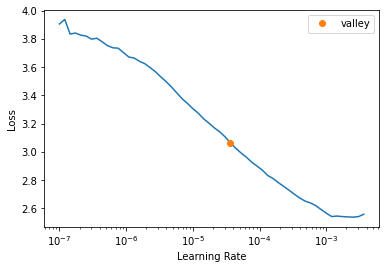

In [ ]:
learner.lr_find()

In [ ]:
def myFineTune(learnerObject, epochs, base_lr=2e-3, freeze_epochs=1, lr_mult=100,
              pct_start=0.3, div=5.0, **kwargs):
    
    # Just freezing maskrcnn backbone
    learnerObject.freeze_to(-2)
    learnerObject.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99, **kwargs)

    base_lr /= 2
    learnerObject.unfreeze()
    learnerObject.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)


In [ ]:
lr = 1e-4
freezeEpochs = 10
unfreezeEpochs = 20
wd = 1e-2

In [ ]:
run = wandb.init(project="diabetesLearning-instanceSegmentation") # track machine learning experiment
fitCallbacks = [WandbCallback(log='all'), SaveModelCallback(every_epoch=False, monitor='dice', fname='stage-1-best',with_opt=True), GradientAccumulation(n_acc=gradientAcc)]
myFineTune(learner, unfreezeEpochs, base_lr=lr, freeze_epochs=freezeEpochs, pct_start=0.3, wd=wd, cbs=fitCallbacks)
run.finish()

## Fine-tunning (optional)

In [ ]:
# import gc
# torch.cuda.empty_cache()
# gc.collect()

In [ ]:
# learner = unet_learner(dataloaders, resnet34, loss_func=CrossEntropyLossFlat(axis=1), metrics=metrics, cbs=callbacks,
#                        wd_bn_bias=True).to_fp16()
# learner.load('stage-1-best')


In [ ]:
learner.unfreeze()
# learner.lr_find()

In [ ]:
lrs = slice(lr/400,lr/4)
epochs = 50
wd = 1e-2

/content/drive/My Drive/Colab Notebooks/DiabetesLearning/fastaiMetrics.py:39: RuntimeWarning: invalid value encountered in true_divide
  iou_index = per_class_TP / (per_class_TP + per_class_FP + per_class_FN)


Better model found at epoch 0 with acc_segmentation value: 0.5323270559310913.


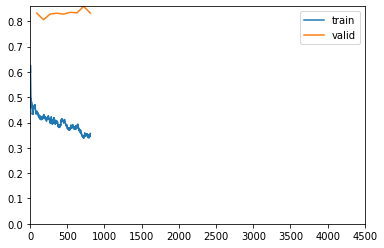

Better model found at epoch 1 with acc_segmentation value: 0.5447819232940674.
No improvement since epoch 1: early stopping


In [ ]:
#run = wandb.init(project="diabetesLearning") # track machine learning experiment
fitCallbacks = [WandbCallback(log='all'), SaveModelCallback(every_epoch=False, monitor='acc_segmentation', fname='stage-2-best',with_opt=True),GradientAccumulation(n_acc=gradientAcc)]
# learner.fit_one_cycle(epochs, lrs, pct_start=0.3, wd=wd, cbs=fitCallbacks)
learner.fit_flat_cos(epochs, lrs, wd=wd, cbs=fitCallbacks)
run.finish()

In [ ]:
# learner.load('stage-2-best')
# learner.save('stage-2-size350-bestEpoch')

## FastAI Validation

In [ ]:
id2name = {k:v for k,v in enumerate(codes)} # faz uma lista que relaciona nome e id

#### fastai metrics names
metricsNames = ["Loss", "Acc_Segmentation", "Dice", "Miou"]

#### add iou per class if you want
from fastaiMetrics import IOU
iouPerClass = []
for x in range(1,len(codes)): iouPerClass.append(IOU(x, codes[x], axis=1, ignore_index=0)) #ignore background idx 0
learner.metrics = metrics + iouPerClass
metricsNames += ["Iou " + codes[x] for x in range(1,len(codes))]

#### LOAD ONLY IF NECESSARY
# learner = unet_learner(dataloaders, resnet34, metrics=metrics+iouPerClass)
# learner.load('stage-1-best')

In [ ]:
#### check if model overfits ####
trainset = tuple(zip(metricsNames,learner.validate(dl=dataloaders.train)))

#### validate validset ####
validset = tuple(zip(metricsNames,learner.validate(dl=dataloaders.valid)))

"Trainset", trainset, "Validset", validset

('Trainset',
 (('Loss', 0.02755793370306492),
  ('Acc_Segmentation', 0.9537791013717651),
  ('Dice', 0.9573008065624846),
  ('Miou', 0.9422343328130169),
  ('Iou Carbs', 0.9327461677416321),
  ('Iou Proteina', 0.9141959532173162),
  ('Iou Vegetais', 0.9314359032125074),
  ('Iou Frutas', 0.921803159355188)),
 'Validset',
 (('Loss', 0.15403492748737335),
  ('Acc_Segmentation', 0.8400511741638184),
  ('Dice', 0.7950899679457022),
  ('Miou', 0.6651723648813872),
  ('Iou Carbs', 0.7581479285091804),
  ('Iou Proteina', 0.6981870425535122),
  ('Iou Vegetais', 0.7938424216521796),
  ('Iou Frutas', 0.3190084457606669)))

In [ ]:
#### validate testset ####
# learner.dls.valid = test_dl
# testset = tuple(zip(metricsNames,learner.validate(dl=test_dl)))
# "Testset", testset

In [ ]:
dl = dataloaders.valid

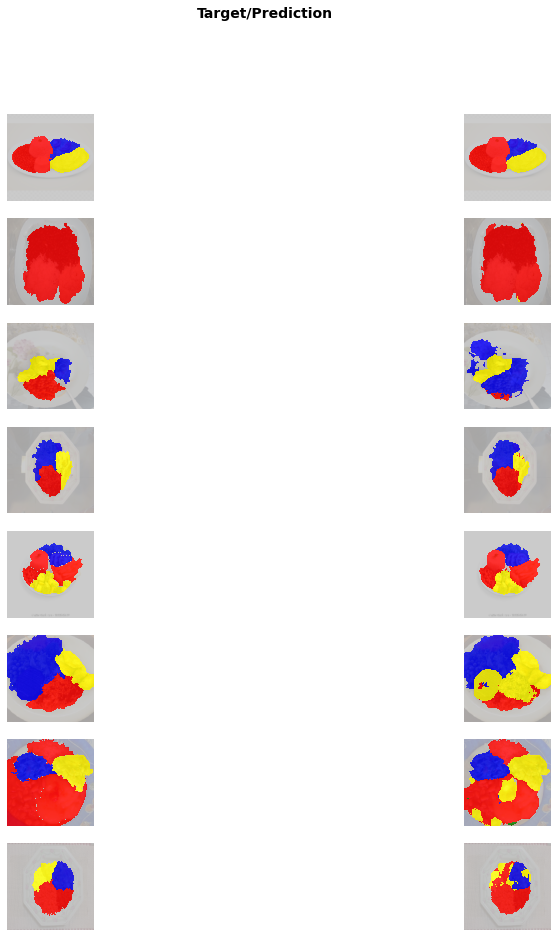

In [ ]:
learner.show_results(dl=dl, figsize=(15,15), max_n=40, cmap=cmap, norm=norm,alpha=0.8)

In [ ]:
# interp = Interpretation.from_learner(learner, dl=test_dl)
# losses,idxs = interp.top_losses()
# interp.plot_top_losses(4, figsize=(15,11), cmap=cmap, norm=norm)

In [ ]:
#interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
#interp.most_confused(min_val=10)

## Sklearn Validation

In [ ]:
from sklearnMetrics import Metrics
void_code = 0
metricsObject = Metrics(codes, [void_code])
id2name = {k:v for k,v in enumerate(codes)} # faz uma lista que relaciona nome e id

# LOAD ONLY IF NECESSARY
# learner = unet_learner(dataloaders, resnet34, metrics=metrics)
# learner.load('stage-1-best')

In [ ]:
#input, probabilities, groundTruth, decoded, losses = learner.get_preds(dl=dl,  with_input=True, with_loss=True, with_decoded=True, act=F.softmax) #inputs, preds, groundTruth, losses
input, probabilities, groundTruth, decoded = learner.get_preds(dl=dl,  with_input=True, with_loss=False, with_decoded=True, act=F.softmax) #inputs, preds, groundTruth, losses

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:255: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  res[pred_i] = act(res[pred_i])


In [ ]:
print(metricsObject.getAccuracy(decoded.flatten().numpy(), groundTruth.flatten().numpy()))

0.8394657058144419


In [ ]:
print(metricsObject.get_f1Score(decoded.flatten().numpy(), groundTruth.flatten().numpy()))

0.8410215281288161


In [ ]:
confusionMatrix = metricsObject.getConfusionMatrix(decoded.flatten().numpy(), groundTruth.flatten().numpy(), plot=False)

In [ ]:
mostConfused = metricsObject.mostConfused(confusionMatrix, numberOfConfusions=4)

print("Actual", "   Predicted", "   Wrong pixels\n")
mostConfused

Actual    Predicted    Wrong pixels



[['Carbs', 'Proteina', 83688],
 ['Proteina', 'Carbs', 68403],
 ['Carbs', 'Vegetais', 54325],
 ['Proteina', 'Vegetais', 28587]]

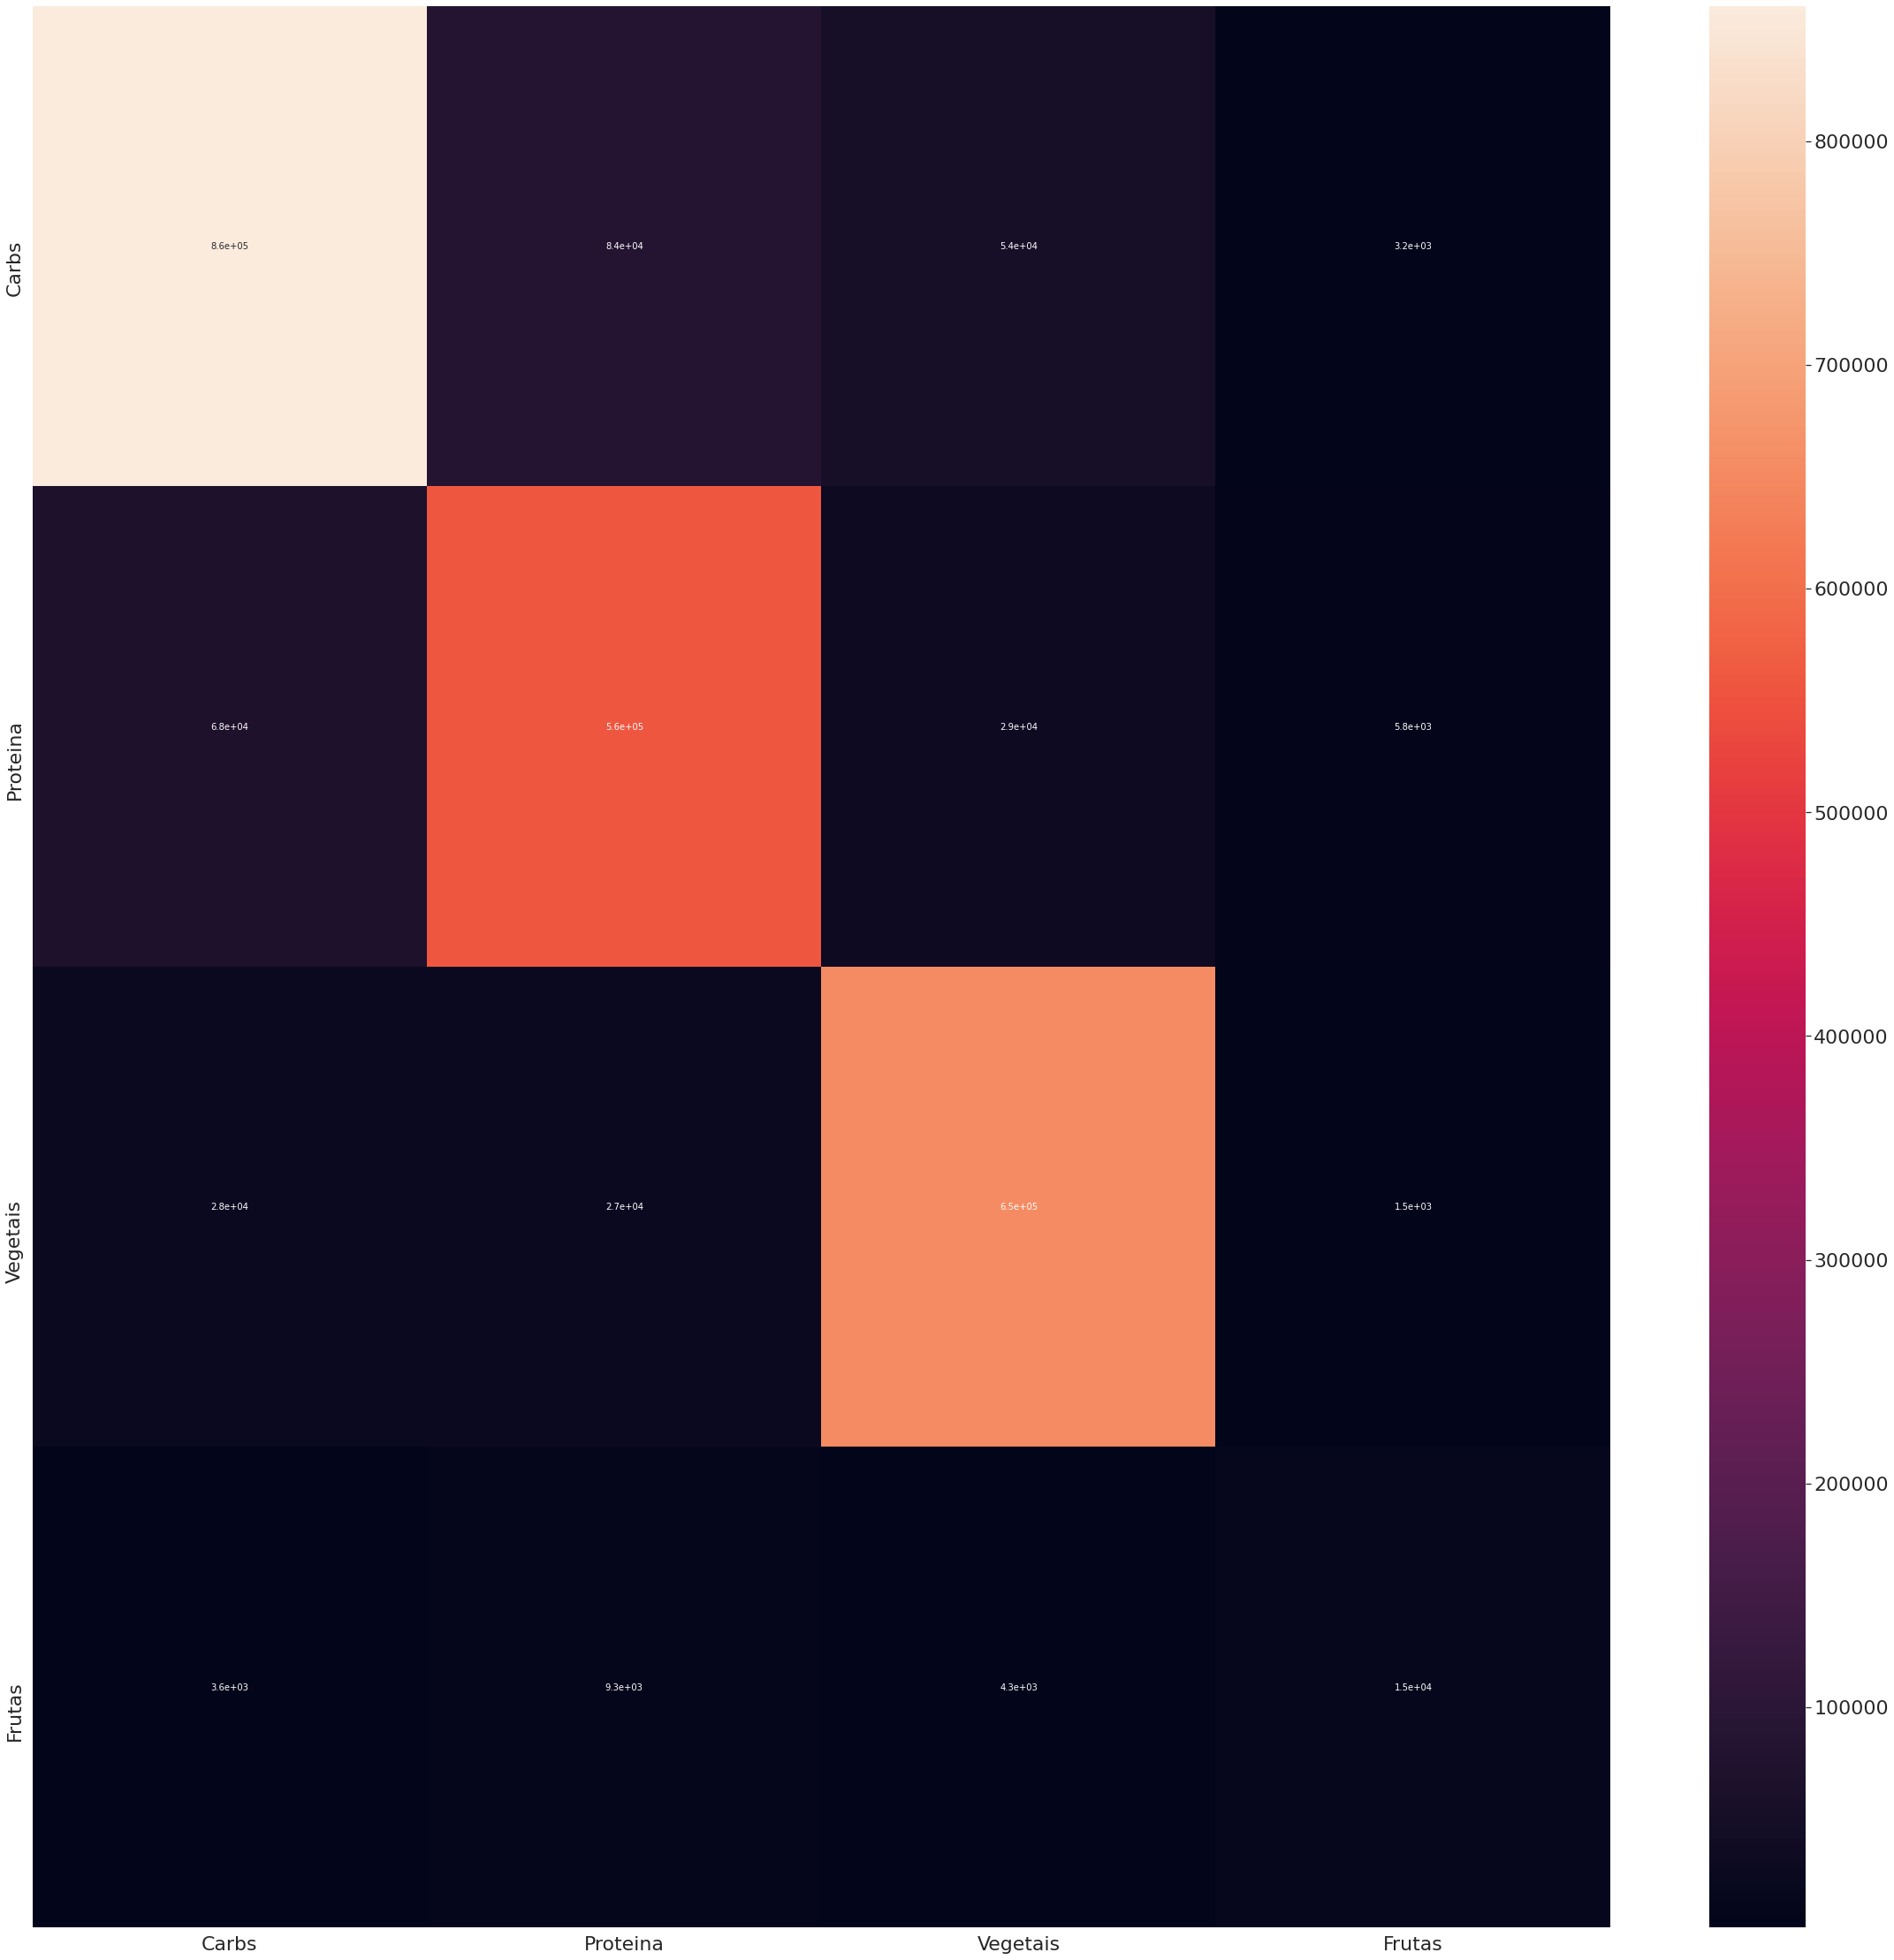

In [ ]:
#plot confusion matrix (take some time, too big the matrix). Think in a better way to visualize (check for most confuseds)

metricsObject.plotConfusionMatrix(confusionMatrix, font_scale=2, removeDiagonal=False)

In [ ]:
print(metricsObject.getClassificationReport(decoded.flatten().numpy(), groundTruth.flatten().numpy()))

              precision    recall  f1-score   support

       Carbs       0.87      0.83      0.85   1035158
    Proteina       0.81      0.82      0.82    676648
    Vegetais       0.85      0.89      0.87    736392
      Frutas       0.53      0.41      0.47     35153

   micro avg       0.84      0.84      0.84   2483351
   macro avg       0.77      0.74      0.75   2483351
weighted avg       0.84      0.84      0.84   2483351



## Check some particular image details

In [ ]:
from collections import OrderedDict

id2name = {k:v for k,v in enumerate(codes)} # faz uma lista que relaciona nome e id

def getFoodsInImage(tensor, removeVoid=False):
    foods, counts = np.unique(tensor,return_counts=True)
    if removeVoid:
        counts = np.delete(counts, 0) #tira o void na posicao 0 do array
        foods = np.delete(foods, 0) #tira o void na posicao 0 do array
    
    foodNames = []
    print(f'Numero de alimentos: {len(foods)}')
    for food in foods:
        foodNames = np.append(foodNames,id2name[food])
    dictCounts = dict(zip(foodNames, counts))
    dictCounts = OrderedDict(sorted(dictCounts.items(), key=lambda x: x[1], reverse=True))
    print(dictCounts)
    return dictCounts

def getMostAppearances(foodCountsDict, k = 3):
    sortedDict = OrderedDict(sorted(foodCountsDict.items(), key=lambda x: x[1], reverse=True))
    topKDict = {}
    for count, (key, v) in enumerate(foodCountsDict.items()):
        if count == k:
            break
        elif key != "NaoAlimento":
            topKDict[key] = v
        else:
            k += 1 # increment k if find NaoAlimento in the first positions
    
    return topKDict
        


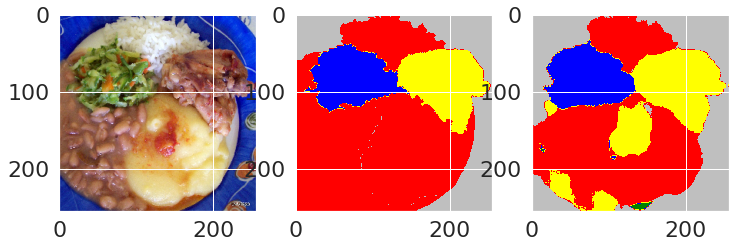

In [ ]:
idx = 6
fig = plt.figure(figsize=(12,12))

# denorm to original image
rawImage = copy(input[idx])

nrm = Normalize.from_stats(*imagenet_stats)
image = nrm.decode(rawImage) #fastai version 2.3.1 needs two denorms!!!! FUCK YOU FASTAI!!!
image = nrm.decode(image).clamp(0,1).squeeze().permute(1,2,0) # denorm image from imagenet stats

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image)

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(groundTruth[idx], cmap=cmap, norm=norm)

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(decoded[idx], cmap=cmap, norm=norm)

In [ ]:
print("Ground truth\n")
sample = groundTruth[idx]
gtDictCounts = getFoodsInImage(sample)


Ground truth

Numero de alimentos: 4
OrderedDict([('Carbs', 36171), ('NaoAlimento', 14300), ('Proteina', 8115), ('Vegetais', 6950)])


In [ ]:
print("Prediction\n")
sample = decoded[idx]
decodedDictCounts = getFoodsInImage(sample)


Prediction

Numero de alimentos: 5
OrderedDict([('Carbs', 25732), ('NaoAlimento', 19203), ('Proteina', 13139), ('Vegetais', 7257), ('Frutas', 205)])


In [ ]:
# get low prob classes

bestProbs, bestProbsIdx = torch.max(probabilities[idx], dim=0)
lowProbs = []
lowProbsIdx = []

mask = bestProbs < 0.5
lowProbsIdx = bestProbsIdx[mask]
lowProbDictCounts = getFoodsInImage(lowProbsIdx)

print("\nPercentual de pixeis com baixa probabilidade\n")
for key, value in lowProbDictCounts.items():
    pct = float(value/decodedDictCounts[key]*100)
    print(key, '{:.2f}'.format(pct), "%" )

Numero de alimentos: 5
OrderedDict([('Carbs', 15695), ('Proteina', 6658), ('NaoAlimento', 3616), ('Vegetais', 2058), ('Frutas', 205)])

Percentual de pixeis com baixa probabilidade

Carbs 60.99 %
Proteina 50.67 %
NaoAlimento 18.83 %
Vegetais 28.36 %
Frutas 100.00 %


In [ ]:
# get high prob classes

bestProbs, bestProbsIdx = torch.max(probabilities[idx], dim=0)

mask = bestProbs > 0.5
highProbsIdx = bestProbsIdx[mask]
highProbDictCounts = getFoodsInImage(highProbsIdx)

print("\nPercentual de pixeis com alta probabilidade\n")
for key, value in highProbDictCounts.items():
    pct = float(value/decodedDictCounts[key]*100)
    print(key, '{:.2f}'.format(pct), "%" )

Numero de alimentos: 5
OrderedDict([('Carbs', 24024), ('NaoAlimento', 18602), ('Proteina', 11822), ('Vegetais', 6995), ('Frutas', 80)])

Percentual de pixeis com alta probabilidade

Carbs 93.36 %
NaoAlimento 96.87 %
Proteina 89.98 %
Vegetais 96.39 %
Frutas 39.02 %


## Predictions of new input data

In [ ]:
# always load it!

learner = unet_learner(dataloaders, resnet34, self_attention=False, act_cls=Mish)
learner.load('stage-1-best')

In [ ]:
#input should be a PIL object

index = 50
img = dataloaders.valid_ds[index][0]

# img_pil = Image.open("3.jpg")
# img = np.asarray(img_pil.resize((400,400)))

pred = learner.predict(img)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(pred[0],cmap=cmap)

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img)

foods = getFoodsInImage(pred[0])
k = 3
mostAppear = list(getMostAppearances(foods, k=k).keys())
print('\n{} principais alimentos:'.format(k),mostAppear)

## REMOVE THIS LATER (TOMAS)

In [ ]:
from sklearn.preprocessing import label_binarize

mask = groundTruth.unsqueeze(dim=1)!=0
gtOneHotEncoded = label_binarize(groundTruth.flatten().numpy(), classes=range(len(codes)))

# groundTruthIgnoringBackground = groundTruth[mask.squeeze()]
# gtOneHotEncoded = label_binarize(groundTruthIgnoringBackground.flatten().numpy(), classes=range(len(codes)))

# probabilitiesIgnoringBackground = probabilities[mask.unsqueeze(dim=1)]
probabilities = probabilities.reshape((-1,16,256*256))
probabilities = probabilities.permute(0,2,1)
probabilities = probabilities.reshape((-1,16))

flatMask = mask.flatten()
# probabilitiesIgnoringBackground = np.array([Tensor(probabilities[i,:]) for i in range(len(flatMask[:100000])) if flatMask[i] == True])
# probabilitiesIgnoringBackground = probabilities[mask.flatten().unsqueeze(dim=1)]

flatMask.shape, probabilities.shape, gtOneHotEncoded.shape

(torch.Size([5636096]), torch.Size([5636096, 16]), (5636096, 16))

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(gtOneHotEncoded.ravel(), probabilities.ravel())
roc_auc = auc(fpr, tpr)

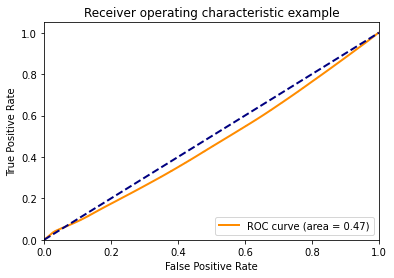

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()